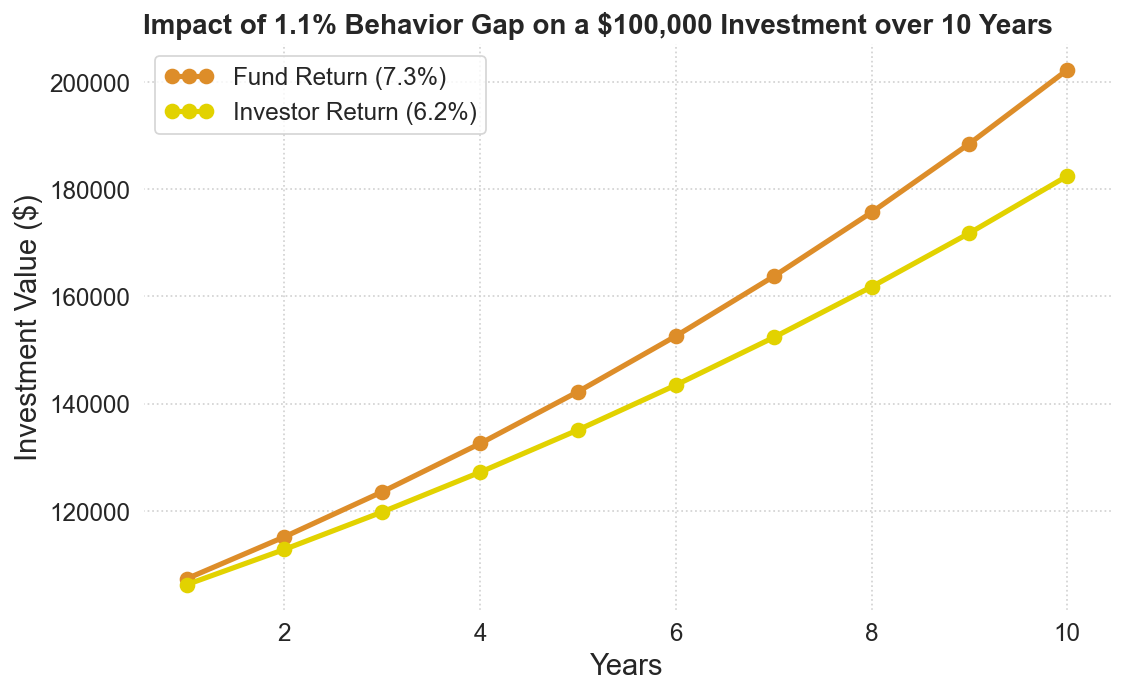

Fund's total return (7.3%): $202,300.62
Investor's return (6.2%): $182,492.56
Dollar difference: $19,808.06


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Initial investment
initial_investment = 100000

# Time period
years = 10

# Fund's total return rate
fund_return_rate = 0.073

# Investor's return rate after the 1.1% deficit
investor_return_rate = 0.062

# Calculate the compound returns for each year
years_array = np.arange(1, years+1)
fund_values = initial_investment * (1 + fund_return_rate) ** years_array
investor_values = initial_investment * (1 + investor_return_rate) ** years_array

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(years_array, fund_values, label='Fund Return (7.3%)', marker='o')
plt.plot(years_array, investor_values, label='Investor Return (6.2%)', marker='o')
plt.title('Impact of 1.1% Behavior Gap on a $100,000 Investment over 10 Years')
plt.xlabel('Years')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.legend(loc='upper left')

# Show plot
plt.show()

# Calculate the final values after 10 years
fund_final_value = fund_values[-1]
investor_final_value = investor_values[-1]

# Calculate the dollar difference
dollar_difference = fund_final_value - investor_final_value

# Format the final values to two decimal places
fund_final_value_formatted = f"${fund_final_value:,.2f}"
investor_final_value_formatted = f"${investor_final_value:,.2f}"
dollar_difference_formatted = f"${dollar_difference:,.2f}"

# Print formatted values
print(f"Fund's total return (7.3%): {fund_final_value_formatted}")
print(f"Investor's return (6.2%): {investor_final_value_formatted}")
print(f"Dollar difference: {dollar_difference_formatted}")

In [7]:
import pandas as pd
import yfinance as yf

def to_millions(value):
    """Convert value to millions, or return 'N/A' if not available."""
    try:
        return value / 1_000_000 if value and value != 'N/A' else 'N/A'
    except TypeError:
        return 'N/A'

def get_fundamentals(ticker):
    """Retrieve stock fundamentals for a given ticker."""
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")
        return None

    return {
        'Ticker': ticker,
        'Market Cap (M)': to_millions(info.get('marketCap')),
        'Enterprise Value (M)': to_millions(info.get('enterpriseValue')),
        'P/E Ratios': {
            'Trailing P/E': info.get('trailingPE', 'N/A'),
            'Forward P/E': info.get('forwardPE', 'N/A'),
            'PEG Ratio': info.get('pegRatio', 'N/A')
        },
        'Price Multiples': {
            'Price to Book': info.get('priceToBook', 'N/A'),
            'Price to Sales': info.get('priceToSalesTrailing12Months', 'N/A')
        },
        'Dividend Yield': info.get('dividendYield', 'N/A'),
        'EPS': info.get('trailingEps', 'N/A'),
        'Revenue (M)': to_millions(info.get('totalRevenue')),
        'Gross Profit (M)': to_millions(info.get('grossProfits')),
        'EBITDA (M)': to_millions(info.get('ebitda')),
        'Net Income (M)': to_millions(info.get('netIncomeToCommon')),
        'Debt to Equity': info.get('debtToEquity', 'N/A'),
        'Ratios': {
            'Current Ratio': info.get('currentRatio', 'N/A'),
            'Quick Ratio': info.get('quickRatio', 'N/A')
        },
        'Risk Metrics': {
            'Audit Risk': info.get('auditRisk', 'N/A'),
            'Board Risk': info.get('boardRisk', 'N/A'),
            'Compensation Risk': info.get('compensationRisk', 'N/A'),
            'Shareholder Rights Risk': info.get('shareHolderRightsRisk', 'N/A'),
            'Overall Risk': info.get('overallRisk', 'N/A')
        },
        'Prices': {
            'Previous Close': info.get('previousClose', 'N/A'),
            'Open': info.get('open', 'N/A'),
            'Day High': info.get('dayHigh', 'N/A'),
            'Day Low': info.get('dayLow', 'N/A'),
            '52 Week High': info.get('fiftyTwoWeekHigh', 'N/A'),
            '52 Week Low': info.get('fiftyTwoWeekLow', 'N/A')
        },
        'Volume': {
            'Current Volume': info.get('volume', 'N/A'),
            'Average Volume': info.get('averageVolume', 'N/A')
        },
        'Company Details': {
            'Name': info.get('longName', 'N/A'),
            'Exchange': info.get('exchange', 'N/A'),
            'Currency': info.get('currency', 'N/A'),
            'Financial Currency': info.get('financialCurrency', 'N/A')
        }
    }

# Load S&P 500 tickers from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(url, header=0)[0]

# Extract and collect fundamentals for each ticker
fundamental_data = []
for ticker in df['Symbol']:
    data = get_fundamentals(ticker)
    if data:
        fundamental_data.append(data)

# Create DataFrame from collected fundamentals and save to Excel
fundamental_df = pd.DataFrame(fundamental_data)
fundamental_df.to_excel('SP500_Fundamentals.xlsx', index=False)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

# Read the data
data = {
    'Temperature_Celsius': [15, 18, 22, 25, 28, 30, 32, 29, 26, 23, 20, 17],
    'Humidity_Percent': [50, 55, 60, 65, 70, 75, 80, 72, 68, 62, 58, 52],
    'Wind_Speed_kmh': [5, 8, 12, 15, 10, 7, 20, 18, 14, 9, 6, 11],
    'Golfers_Count': [20, 35, 50, 75, 100, 120, 90, 110, 85, 60, 40, 25],
    'Green_Speed': [8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 11.0, 10.5, 10.0, 9.5, 9.0]
}

df = pd.DataFrame(data)

# 1. Min-Max Scaling for Temperature_Celsius
min_max_scaler = MinMaxScaler()
df['Temperature_MinMax'] = min_max_scaler.fit_transform(df[['Temperature_Celsius']])

# 2. Standard Scaling for Wind_Speed_kmh
std_scaler = StandardScaler()
df['Wind_Speed_Standardized'] = std_scaler.fit_transform(df[['Wind_Speed_kmh']])

# 3. Robust Scaling for Humidity_Percent
robust_scaler = RobustScaler()
df['Humidity_Robust'] = robust_scaler.fit_transform(df[['Humidity_Percent']])

# 4. Log Transformation for Golfers_Count
df['Golfers_Log'] = np.log1p(df['Golfers_Count'])
df['Golfers_Log_std'] = std_scaler.fit_transform(df[['Golfers_Log']])

# 5. Box-Cox Transformation for Green_Speed
box_cox_transformer = PowerTransformer(method='box-cox') # By default already has standardizing
df['Green_Speed_BoxCox'] = box_cox_transformer.fit_transform(df[['Green_Speed']])

# Display the results
transformed_data = df[[
    'Temperature_MinMax',
    'Humidity_Robust',
    'Wind_Speed_Standardized',
    'Green_Speed_BoxCox',
    'Golfers_Log_std',
]]

transformed_data = transformed_data.round(2)
print(transformed_data)

    Temperature_MinMax  Humidity_Robust  Wind_Speed_Standardized  \
0                 0.00            -1.02                    -1.38   
1                 0.18            -0.64                    -0.72   
2                 0.41            -0.26                     0.17   
3                 0.59             0.11                     0.83   
4                 0.76             0.49                    -0.28   
5                 0.88             0.87                    -0.94   
6                 1.00             1.25                     1.93   
7                 0.82             0.64                     1.49   
8                 0.65             0.34                     0.61   
9                 0.47            -0.11                    -0.50   
10                0.29            -0.42                    -1.16   
11                0.12            -0.87                    -0.06   

    Green_Speed_BoxCox  Golfers_Log_std  
0                -1.70            -1.87  
1                -1.13         

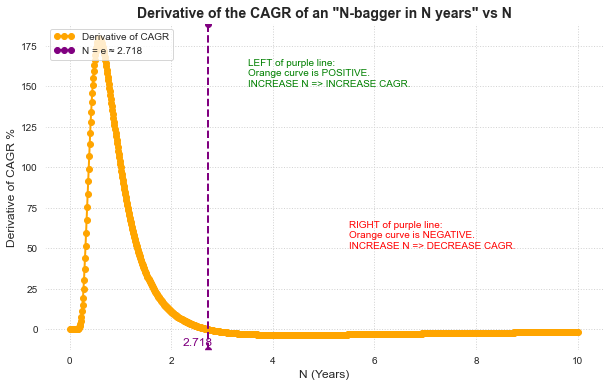

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Define the derivative of the CAGR function
def derivative_cagr(N):
    return 100 * (N**(1/N) * (1 - np.log(N)) / N**2)

# Generate values of N from a small positive number to 10
N_values = np.linspace(0.01, 10, 1000)
derivative_values = derivative_cagr(N_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, derivative_values, color='orange', label="Derivative of CAGR")

# Plot the vertical line at N = e (approximately 2.718)
plt.axvline(x=np.e, color='purple', linestyle='--', label="N = e ≈ 2.718")

# Add text annotations
plt.text(3.5, 150, 'LEFT of purple line:\nOrange curve is POSITIVE.\nINCREASE N => INCREASE CAGR.',
         color='green', fontsize=10)
plt.text(5.5, 50, 'RIGHT of purple line:\nOrange curve is NEGATIVE.\nINCREASE N => DECREASE CAGR.',
         color='red', fontsize=10)
plt.text(np.e - 0.5, -10, '2.718', color='purple', fontsize=12)

# Labels and title
plt.title('Derivative of the CAGR of an "N-bagger in N years" vs N', fontsize=14)
plt.xlabel('N (Years)', fontsize=12)
plt.ylabel('Derivative of CAGR %', fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

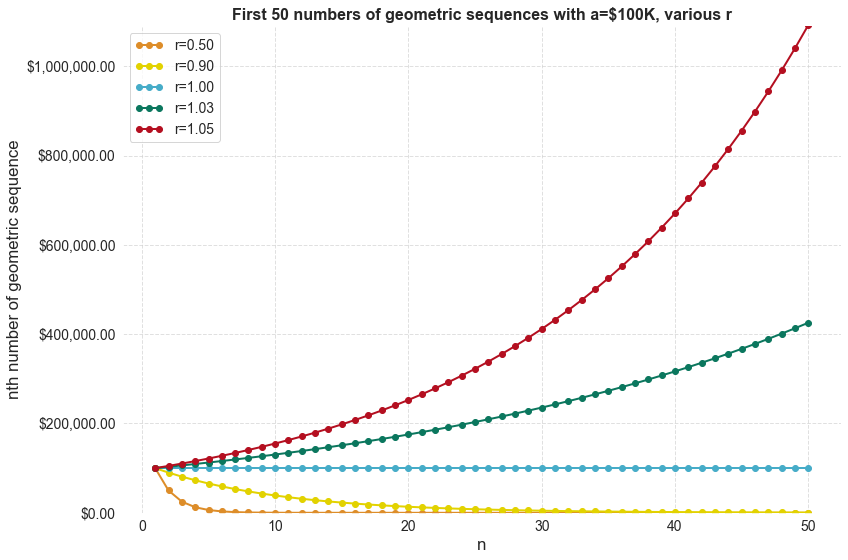

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the style to 'wes_anderson'
plt.style.use('wes_anderson')

# Set up the parameters
a = 100000  # Starting value
n = np.arange(1, 51)  # First 50 numbers
rates = [0.50, 0.90, 1.00, 1.03, 1.05]  # Different rates

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each geometric sequence
for r in rates:
    sequence = a * r ** (n - 1)
    plt.plot(n, sequence, marker='o', label=f'r={r:.2f}')

# Customize the plot
plt.title('First 50 numbers of geometric sequences with a=$100K, various r')
plt.xlabel('n')
plt.ylabel('nth number of geometric sequence')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis to display currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.2f}'))

# Set y-axis limits to match the image
plt.ylim(0, 1.09e6)

# Show the plot
plt.tight_layout()
plt.show()

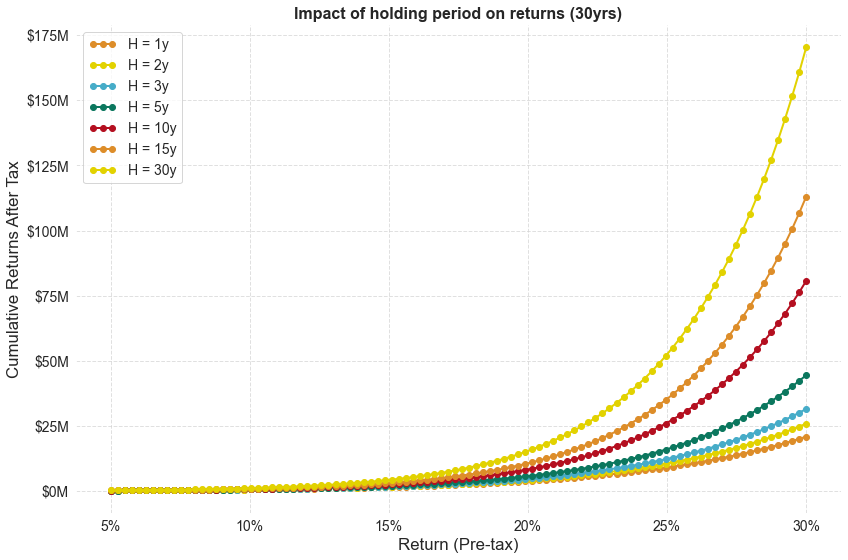

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the style
plt.style.use('wes_anderson')

def calculate_return(initial_investment, annual_return, years, tax_rate, holding_period):
    total = initial_investment
    for year in range(1, years + 1):
        total *= (1 + annual_return)
        if year % holding_period == 0:
            gain = total - initial_investment
            tax = gain * tax_rate
            total -= tax
            initial_investment = total  # Reset basis after tax payment
    return total

initial_investment = 100000
tax_rate = 0.35  # 15% tax rate
years = 30
holding_periods = [1, 2, 3, 5, 10, 15, years]
returns = np.linspace(0.05, 0.30, 100)

plt.figure(figsize=(12, 8))

for h in holding_periods:
    final_values = [calculate_return(initial_investment, r, years, tax_rate, h) / 1e6 for r in returns]
    plt.plot(returns * 100, final_values, label=f'H = {h}y')

plt.title(f"Impact of holding period on returns ({years}yrs)")
plt.xlabel("Return (Pre-tax)")
plt.ylabel("Cumulative Returns After Tax")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}M'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

plt.tight_layout()
plt.show()

In [13]:
from datetime import datetime

# Function to calculate the XNPV based on a guess for the rate (IRR)
def xnpv(rate, cashflows):
    return sum([cf / (1 + rate) ** ((date - cashflows[0][1]).days / 365.0) for cf, date in cashflows])

# Function to calculate XIRR using the Newton-Raphson method
def xirr(cashflows, guess=0.1):
    tol = 1e-6  # Tolerance level
    max_iter = 1000  # Maximum number of iterations
    rate = guess

    for i in range(max_iter):
        # Calculate the current NPV and its derivative
        npv = xnpv(rate, cashflows)
        npv_derivative = sum([-cf * (date - cashflows[0][1]).days / 365.0 / (1 + rate) ** (((date - cashflows[0][1]).days / 365.0) + 1) for cf, date in cashflows])

        # Update the rate using Newton-Raphson formula
        new_rate = rate - npv / npv_derivative

        # If the change in rate is within tolerance, return the result
        if abs(new_rate - rate) < tol:
            return new_rate

        rate = new_rate

    raise Exception("XIRR calculation did not converge")

# Define your updated cashflows and corresponding dates from the image
cashflows_updated = [
    (-75888, datetime(2015, 12, 31)),  # Cash outflow for buying 100 shares
    (-43615, datetime(2017, 4, 25)),   # Cash outflow for buying 50 shares
    (86695, datetime(2018, 7, 27)),    # Cash inflow for selling shares
    (121244, datetime(2020, 7, 17))    # Final value / balance
]

# Calculate XIRR with the updated cashflows
xirr_value_updated = xirr(cashflows_updated)
print(f"XIRR (Annualized Return): {xirr_value_updated:.6%}")

XIRR (Annualized Return): 18.935797%


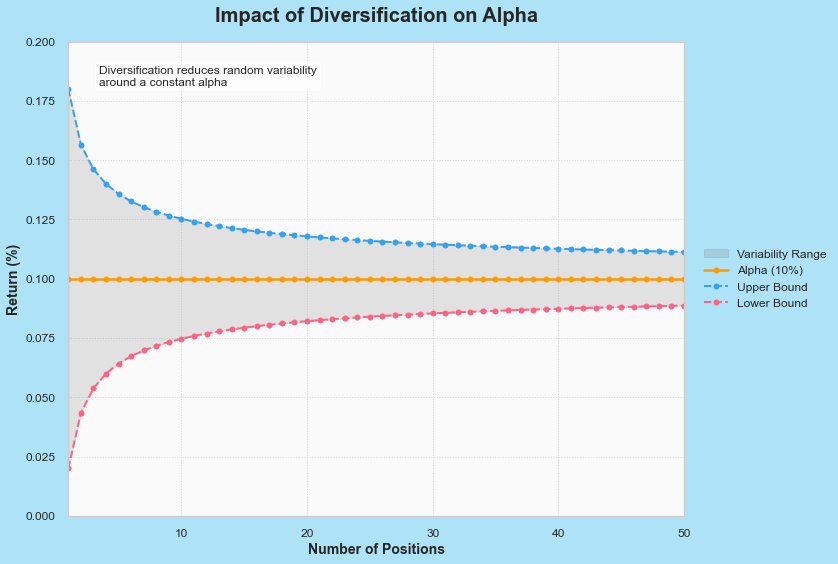

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_diversification_impact(alpha=0.10, initial_std_dev=0.08, max_stocks=50):
    # Set theme and palette using Seaborn's set_theme for better integration
    sns.set_theme(style="whitegrid", palette="deep")

    # Define parameters
    num_stocks = np.arange(1, max_stocks + 1)

    # Calculate standard deviation for each level of diversification
    std_dev = initial_std_dev / np.sqrt(num_stocks)

    # Calculate upper and lower bounds
    upper_bound = alpha + std_dev
    lower_bound = np.maximum(alpha - std_dev, 0)  # Ensure lower bound doesn't go below 0

    # Create alpha line (constant at 10%)
    alpha_line = np.full(num_stocks.shape, alpha)  # Use np.full instead of np.full_like

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot shaded area for variability range
    ax.fill_between(num_stocks, lower_bound, upper_bound, alpha=0.2, color='gray', label='Variability Range')

    # Plot alpha and bounds
    ax.plot(num_stocks, alpha_line, color='#FF9900', linewidth=2.5, label=f'Alpha ({alpha*100:.0f}%)')
    ax.plot(num_stocks, upper_bound, color='#36A2EB', linestyle='--', linewidth=2, label='Upper Bound')
    ax.plot(num_stocks, lower_bound, color='#FF6384', linestyle='--', linewidth=2, label='Lower Bound')

    # Customize the plot
    ax.set_title('Impact of Diversification on Alpha', fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('Number of Positions', fontsize=14, fontweight='bold')
    ax.set_ylabel('Return (%)', fontsize=14, fontweight='bold')
    ax.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.25, 0.5))
    ax.grid(True, linestyle=':', alpha=0.7)

    # Set axis limits
    ax.set_xlim(1, max_stocks)
    ax.set_ylim(0.00, 0.20)

    # Add text annotation with improved wording
    ax.text(
        0.05, 0.95,
        'Diversification reduces random variability\naround a constant alpha',
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Add a subtle background color
    fig.patch.set_facecolor('#aee2f6')  # Light blue background for the figure
    ax.set_facecolor('#FAFAFA')          # Almost white background for the plot area

    plt.tight_layout()
    plt.savefig('diversification_alpha_impact.png', dpi=600, bbox_inches='tight')
    plt.show()

# Call the function
plot_diversification_impact()

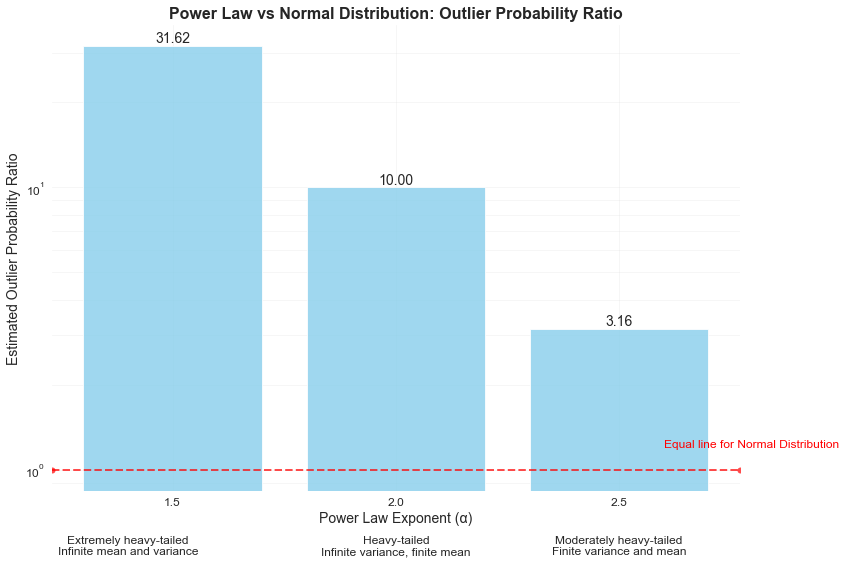


Probability of outlier > 3σ in normal distribution: 0.001350
Estimated probability for power law (α=1.5): 0.042688
  31.62x more likely than normal distribution
Estimated probability for power law (α=2): 0.013499
  10.00x more likely than normal distribution
Estimated probability for power law (α=2.5): 0.004269
  3.16x more likely than normal distribution

Probability of outlier > 4σ in normal distribution: 0.000032
Estimated probability for power law (α=1.5): 0.001002
  31.62x more likely than normal distribution
Estimated probability for power law (α=2): 0.000317
  10.00x more likely than normal distribution
Estimated probability for power law (α=2.5): 0.000100
  3.16x more likely than normal distribution

Probability of outlier > 5σ in normal distribution: 0.000000
Estimated probability for power law (α=1.5): 0.000009
  31.62x more likely than normal distribution
Estimated probability for power law (α=2): 0.000003
  10.00x more likely than normal distribution
Estimated probability 

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set style
plt.style.use('wes_anderson')

def outlier_ratio(alpha):
    """Rough heuristic for outlier probability ratio."""
    return 10 ** (3 - alpha)

def normal_dist_outlier_prob(sigma):
    """Calculate the probability of an outlier beyond sigma standard deviations."""
    return 1 - norm.cdf(sigma)

# Define specific alpha values
alphas = [1.5, 2, 2.5]

# Calculate ratios
ratios = [outlier_ratio(alpha) for alpha in alphas]

# Create the plot
plt.figure(figsize=(12, 8))

# Bar plot
bars = plt.bar(alphas, ratios, width=0.4, alpha=0.8, color='skyblue')
plt.title('Power Law vs Normal Distribution: Outlier Probability Ratio', fontsize=16)
plt.xlabel('Power Law Exponent (α)', fontsize=14)
plt.ylabel('Estimated Outlier Probability Ratio', fontsize=14)
plt.yscale('log')
plt.xticks(alphas, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=14)

# Add a horizontal line for ratio = 1 (equal to normal distribution)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7)
plt.text(2.6, 1.2, 'Equal line for Normal Distribution', color='red', fontsize=12)

# Improve grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add text explanations
plt.text(1.4, 0.5, "Extremely heavy-tailed\nInfinite mean and variance", fontsize=12, ha='center')
plt.text(2.0, 0.5, "Heavy-tailed\nInfinite variance, finite mean", fontsize=12, ha='center')
plt.text(2.5, 0.5, "Moderately heavy-tailed\nFinite variance and mean", fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('Outlier Probability Ratio.png', dpi=600, bbox_inches='tight')

plt.show()

# Print numeric comparisons
sigmas = [3, 4, 5]
for sigma in sigmas:
    normal_prob = normal_dist_outlier_prob(sigma)
    print(f"\nProbability of outlier > {sigma}σ in normal distribution: {normal_prob:.6f}")

    for alpha in alphas:
        ratio = outlier_ratio(alpha)
        power_law_prob = normal_prob * ratio
        print(f"Estimated probability for power law (α={alpha}): {power_law_prob:.6f}")
        print(f"  {ratio:.2f}x more likely than normal distribution")

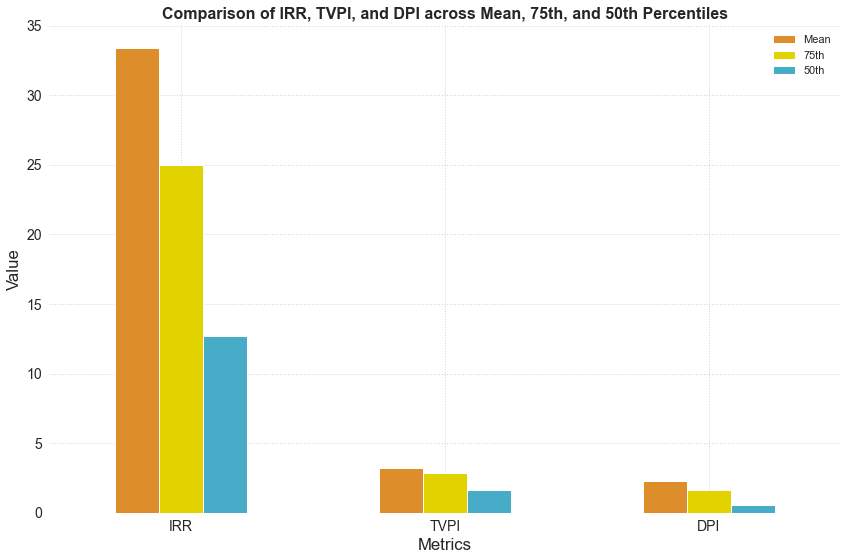

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided Excel file
file_path = 'Mean and Top Quartile Compare.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the relevant sheet 'Funds Measure Detail Report'
df = pd.read_excel(file_path, sheet_name='Funds Measure Detail Report')

# Extract the relevant data for IRR, TVPI, and DPI for Mean, 75th, and 50th
metrics = ['IRR', 'TVPI', 'DPI']
columns = ['Mean', '75th', '50th']

# Filter data for the selected metrics and columns
filtered_df = df[df['Unnamed: 0'].isin(metrics)][['Unnamed: 0'] + columns]
filtered_df.set_index('Unnamed: 0', inplace=True)

# Plotting grouped bar chart
filtered_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of IRR, TVPI, and DPI across Mean, 75th, and 50th Percentiles')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Percentiles')
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig('Comparison', dpi=600, bbox_inches='tight')

# Show plot
plt.show()

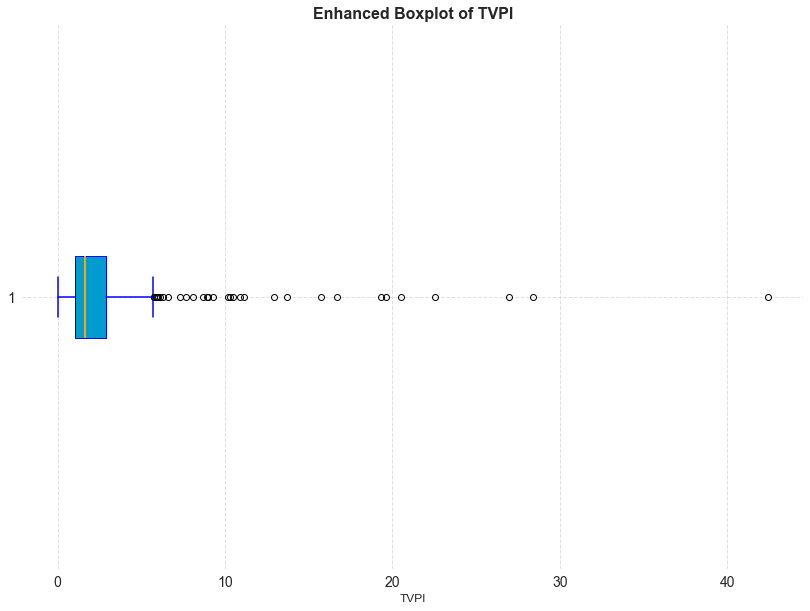

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded Excel file
file_path = 'boxplot.xlsx'
excel_data = pd.read_excel(file_path)

# Improving the visual of the boxplot by adding customization

plt.figure(figsize=(14, 10))
plt.boxplot(excel_data['TVPI'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#009ccf', color='blue'),
            medianprops=dict(color='orange', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=1.5),
            capprops=dict(color='blue', linewidth=1.5))

plt.title('Enhanced Boxplot of TVPI', fontsize=16)
plt.xlabel('TVPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the improved boxplot
plt.show()

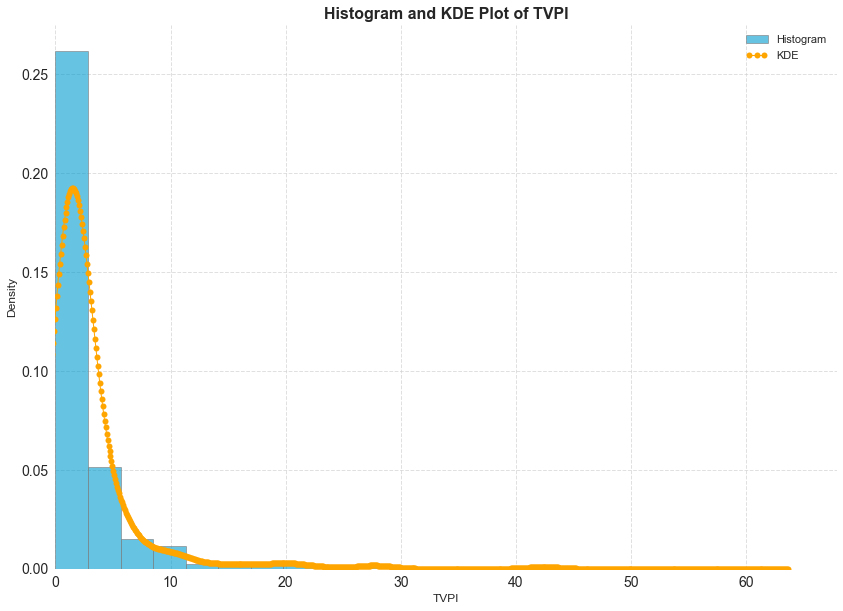

In [59]:
# Plotting a histogram with KDE overlay to visualize skewness

plt.figure(figsize=(14, 10))
# Histogram
plt.hist(excel_data['TVPI'], bins=15, alpha=0.6, color='#009ccf', edgecolor='grey', density=True, label='Histogram')

# KDE plot
excel_data['TVPI'].plot(kind='kde', color='orange', linewidth=1, label='KDE')

plt.xlim(left=0)  # Setting xmin to 0
plt.title('Histogram and KDE Plot of TVPI', fontsize=16)
plt.xlabel('TVPI', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')


# Show the plot
plt.show()

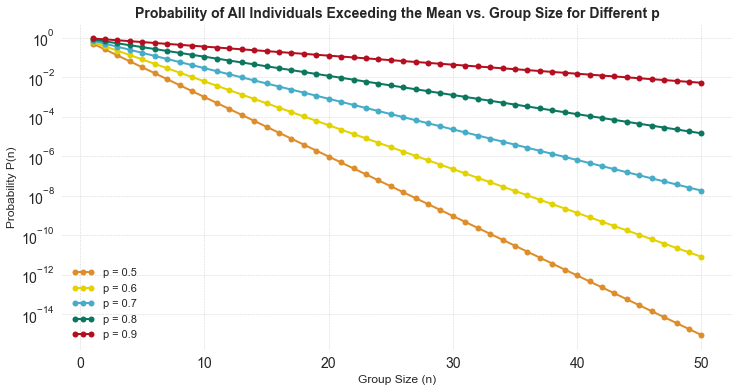

In [61]:
# Define individual probabilities
p_values = [0.5, 0.6, 0.7, 0.8, 0.9]

# Define group sizes
group_sizes = np.arange(1, 51)  # Limit group size for clarity

# Create the plot
plt.figure(figsize=(12, 6))

# Plot for each p value
for p in p_values:
    probabilities = p ** group_sizes
    plt.plot(group_sizes, probabilities, marker='o', linestyle='-', label=f'p = {p}')

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Add titles and labels
plt.title('Probability of All Individuals Exceeding the Mean vs. Group Size for Different p', fontsize=14)
plt.xlabel('Group Size (n)', fontsize=12)
plt.ylabel('Probability P(n)', fontsize=12)

# Add gridlines
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(loc='lower left')

# Show the plot
plt.show()

In [4]:
import pandas as pd
import numpy as np

# Load the spreadsheet
file_path = 'Benchmark Providers.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate mean and standard deviation for Cambridge, Burgiss, and Pitchbook
statistics = df[['Cambridge', 'Burgiss', 'Pitchbook']].agg(['mean', 'std'])

# Calculate the correlation matrix for Cambridge, Burgiss, and Pitchbook
correlation_matrix = df[['Cambridge', 'Burgiss', 'Pitchbook']].corr()

# Extract the standard deviations from the statistics DataFrame
std_devs = statistics.loc['std']

# Calculate the mean and standard deviation for the standard deviations
std_dev_mean = std_devs.mean()
std_dev_std = std_devs.std()

# Flatten the correlation matrix to get correlation values excluding the diagonal (self-correlation)
correlations = correlation_matrix.values[np.triu_indices(3, k=1)]

# Calculate the mean and standard deviation for the correlations
correlation_mean = correlations.mean()
correlation_std = correlations.std()

# Output the results
print("Summary Statistics (Mean and Standard Deviation):")
print(statistics)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nMean and Standard Deviation of Standard Deviations:")
print(f"Mean of Standard Deviations: {std_dev_mean}")
print(f"Standard Deviation of Standard Deviations: {std_dev_std}")

print("\nMean and Standard Deviation of Correlations:")
print(f"Mean of Correlations: {correlation_mean}")
print(f"Standard Deviation of Correlations: {correlation_std}")

Summary Statistics (Mean and Standard Deviation):
      Cambridge   Burgiss  Pitchbook
mean   2.228571  2.255714   1.877619
std    0.858215  0.826508   0.603091

Correlation Matrix:
           Cambridge   Burgiss  Pitchbook
Cambridge   1.000000  0.975585   0.876299
Burgiss     0.975585  1.000000   0.936353
Pitchbook   0.876299  0.936353   1.000000

Mean and Standard Deviation of Standard Deviations:
Mean of Standard Deviations: 0.7626047711049603
Standard Deviation of Standard Deviations: 0.1390494665783949

Mean and Standard Deviation of Correlations:
Mean of Correlations: 0.9294122540733406
Standard Deviation of Correlations: 0.04082945279297277


Summary Statistics (Mean and Standard Deviation):


,Cambridge,Burgiss,Pitchbook
mean,2.228571,2.255714,1.877619
std,0.858215,0.826508,0.603091


,Cambridge,Burgiss,Pitchbook
mean,2.2286,2.2557,1.8776
std,0.8582,0.8265,0.6031


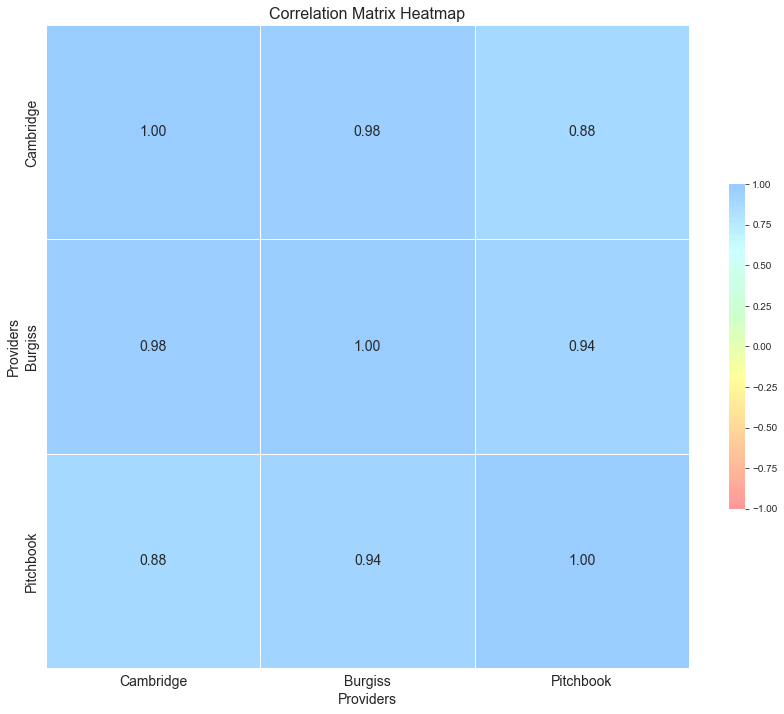

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load the spreadsheet
file_path = 'Benchmark Providers.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate mean and standard deviation for Cambridge, Burgiss, and Pitchbook
statistics = df[['Cambridge', 'Burgiss', 'Pitchbook']].agg(['mean', 'std'])

# Calculate the correlation matrix for Cambridge, Burgiss, and Pitchbook
correlation_matrix = df[['Cambridge', 'Burgiss', 'Pitchbook']].corr()

# Extract the standard deviations from the statistics DataFrame
std_devs = statistics.loc['std']

# Calculate the mean and standard deviation for the standard deviations
std_dev_mean = std_devs.mean()
std_dev_std = std_devs.std()

# Flatten the correlation matrix to get correlation values excluding the diagonal (self-correlation)
correlations = correlation_matrix.values[np.triu_indices(3, k=1)]

# Calculate the mean and standard deviation for the correlations
correlation_mean = correlations.mean()
correlation_std = correlations.std()

# Display the summary statistics
print("Summary Statistics (Mean and Standard Deviation):")
display(statistics)

# Create a styled table for summary statistics
styled_stats = statistics.style.format("{:.4f}")
styled_stats = styled_stats.set_caption("Summary Statistics")
display(styled_stats)

# Create a custom pastel colormap
pastel_colors = ['#ff9999', '#ffcc99', '#ffff99', '#ccffcc', '#ccffff', '#99ccff']
n_bins = 100
pastel_cmap = LinearSegmentedColormap.from_list('pastel', pastel_colors, N=n_bins)

# Create a heatmap for the correlation matrix with pastel colormap and increased font sizes
plt.figure(figsize=(12, 10))  # Increased figure size
sns.heatmap(correlation_matrix, annot=True, cmap=pastel_cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 14},  # Increased annotation font size
            fmt=".2f")  # Format annotations to show 2 decimal places

# Increase font size for title, labels, and tick labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Providers', fontsize=14)
plt.ylabel('Providers', fontsize=14)
plt.tick_params(labelsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

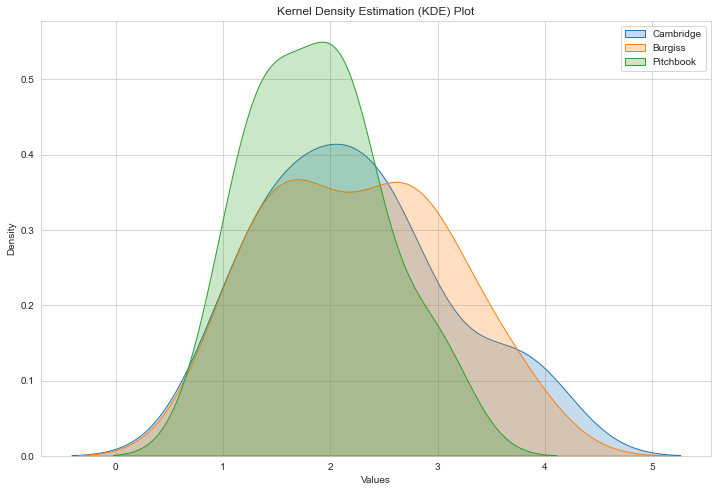

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set up the notebook style
sns.set_style("whitegrid")

# Load the Excel file
file_path = 'Benchmark Providers2.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Kernel Density Estimation (KDE) plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data['Cambridge'], fill=True, label='Cambridge')
sns.kdeplot(data=data['Burgiss'], fill=True, label='Burgiss')
sns.kdeplot(data=data['Pitchbook'], fill=True, label='Pitchbook')
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.savefig('KDE Estimate.png', dpi=600, bbox_inches='tight')

plt.show()

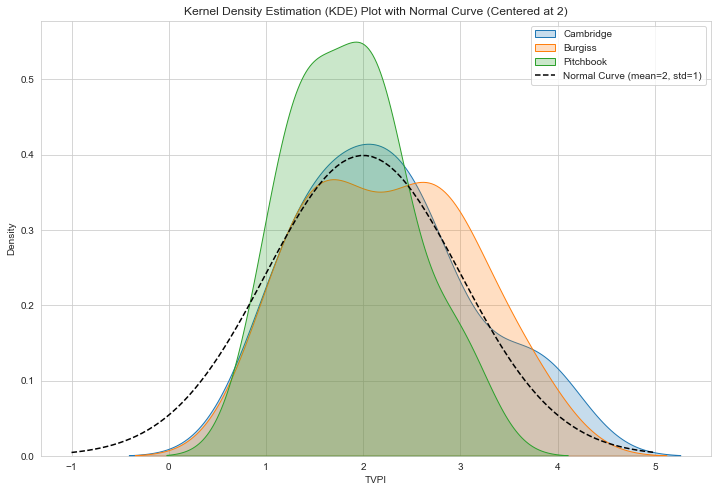

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Set up the notebook style
sns.set_style("whitegrid")

# Load the Excel file
file_path = 'Benchmark Providers2.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Set up the figure
plt.figure(figsize=(12, 8))

# Kernel Density Estimation (KDE) plot
sns.kdeplot(data=data['Cambridge'], fill=True, label='Cambridge')
sns.kdeplot(data=data['Burgiss'], fill=True, label='Burgiss')
sns.kdeplot(data=data['Pitchbook'], fill=True, label='Pitchbook')

# Plot a normal distribution centered at x=2 (mean=2, std_dev=1)
x_values = np.linspace(-1, 5, 100)  # Adjust x-range to fit KDE plot and centered curve
y_values = stats.norm.pdf(x_values, 2, 1)  # Center the normal curve at 2
plt.plot(x_values, y_values, label='Normal Curve (mean=2, std=1)', linestyle='--', color='black')

# Add titles and labels
plt.title('Kernel Density Estimation (KDE) Plot with Normal Curve (Centered at 2)')
plt.xlabel('TVPI')
plt.ylabel('Density')
plt.legend()
plt.savefig('DataComparison', dpi=600, bbox_inches='tight')

plt.show()

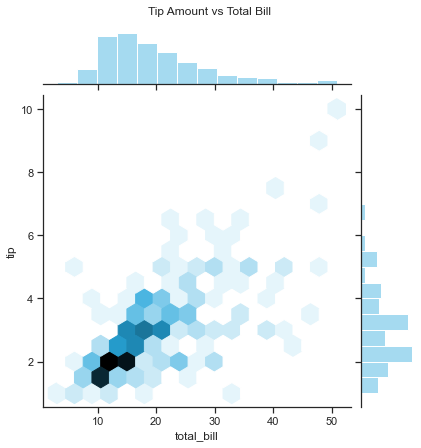

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Loading pre-existing data
tips = sns.load_dataset("tips")

# Create a hexbin plot with sns.jointplot
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex", color="skyblue")

# Add title using suptitle
g.fig.suptitle("Tip Amount vs Total Bill", y=1.03)

# Show the plot
plt.show()

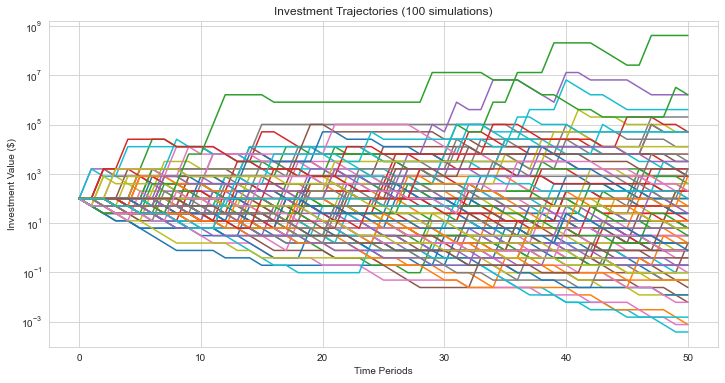

Average final value: $4236830.45
Minimum final value: $0.00
Maximum final value: $419430400.00


In [2]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

def simulate_investment(initial_investment, num_periods):
    trajectory = [initial_investment]
    current_investment = initial_investment

    for _ in range(num_periods):
        chance = random.random()
        if chance < 0.05:  # 5% chance of 16x
            current_investment *= 16
        elif chance < 0.30:  # 25% chance of 0.5x (losing 50%)
            current_investment *= 0.5
        # 70% chance of no change
        trajectory.append(current_investment)

    return trajectory

# Simulation parameters
initial_investment = 100
num_periods = 50
num_simulations = 100

# Run simulations
simulations = [simulate_investment(initial_investment, num_periods) for _ in range(num_simulations)]

# Plotting
plt.figure(figsize=(12, 6))
for sim in simulations:
    plt.plot(range(num_periods + 1), sim)

plt.title(f"Investment Trajectories ({num_simulations} simulations)")
plt.xlabel("Time Periods")
plt.ylabel("Investment Value ($)")
plt.yscale('log')  # Using log scale for better visualization
plt.grid(True)
plt.show()

# Calculate and print some statistics
final_values = [sim[-1] for sim in simulations]
print(f"Average final value: ${sum(final_values) / len(final_values):.2f}")
print(f"Minimum final value: ${min(final_values):.2f}")
print(f"Maximum final value: ${max(final_values):.2f}")

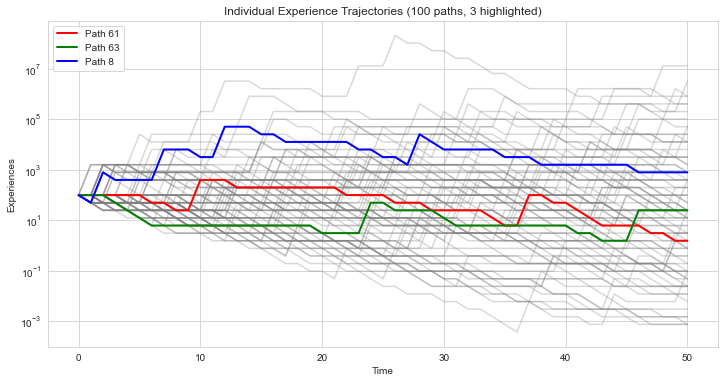

In [7]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

def simulate_investment(initial_investment, num_periods):
    trajectory = [initial_investment]
    current_investment = initial_investment

    for _ in range(num_periods):
        chance = random.random()
        if chance < 0.05:  # 5% chance of 16x
            current_investment *= 16
        elif chance < 0.30:  # 25% chance of 0.5x (losing 50%)
            current_investment *= 0.5
        # 70% chance of no change
        trajectory.append(current_investment)

    return trajectory

# Simulation parameters
initial_investment = 100
num_periods = 50
num_simulations = 100

# Run simulations
simulations = [simulate_investment(initial_investment, num_periods) for _ in range(num_simulations)]

# Randomly select 3 simulations to highlight
highlighted_indices = random.sample(range(num_simulations), 3)
highlighted_colors = ['red', 'green', 'blue']

# Plotting
plt.figure(figsize=(12, 6))

# Plot non-highlighted simulations
for i, sim in enumerate(simulations):
    if i not in highlighted_indices:
        plt.plot(range(num_periods + 1), sim, color='gray', alpha=0.3)

# Plot highlighted simulations
for i, color in zip(highlighted_indices, highlighted_colors):
    plt.plot(range(num_periods + 1), simulations[i], color=color, linewidth=2, label=f'Path {i+1}')

plt.title(f"Individual Experience Trajectories ({num_simulations} paths, 3 highlighted)")
plt.xlabel("Time")
plt.ylabel("Experiences")
plt.yscale('log')  # Using log scale for better visualization
plt.grid(True)
plt.legend()
plt.show()

# Calculate and print some statistics
#final_values = [sim[-1] for sim in simulations]
#print(f"Average final value: ${sum(final_values) / len(final_values):.2f}")
#print(f"Minimum final value: ${min(final_values):.2f}")
#print(f"Maximum final value: ${max(final_values):.2f}")

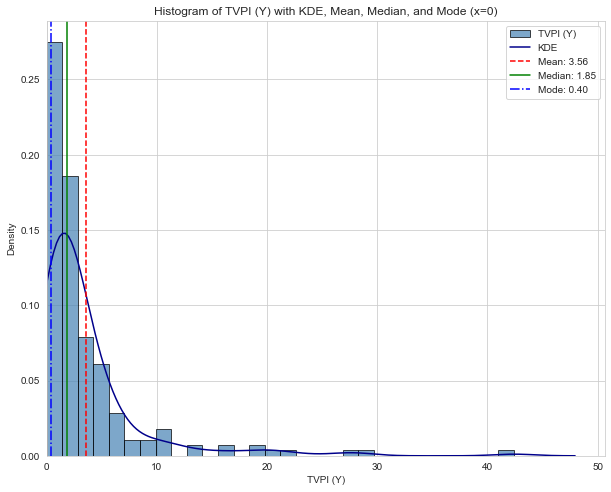

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

# Load the data (assumes the data is loaded from the file correctly)
file_path = 'Funds_Relationship_Explorer-8.xlsx'
data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')

# Clean the data to ensure only numeric values in TVPI (Y)
data_cleaned_numeric = pd.to_numeric(data['TVPI (Y)'], errors='coerce').dropna()

# Recalculate statistics for cleaned data
mean_tvpi_cleaned = data_cleaned_numeric.mean()
median_tvpi_cleaned = data_cleaned_numeric.median()
mode_tvpi_cleaned = data_cleaned_numeric.mode()

# Creating the histogram and KDE with x-axis minimum set to 0
plt.figure(figsize=(10, 8))

# Plot histogram with density set to True for normalization
plt.hist(data_cleaned_numeric, bins=30, color='steelblue', edgecolor='black', alpha=0.7, label='TVPI (Y)', density=True)

# Overlay KDE plot
sns.kdeplot(data_cleaned_numeric, color="darkblue", label="KDE")

# Plot mean, median, and mode
plt.axvline(mean_tvpi_cleaned, color='red', linestyle='--', label=f'Mean: {mean_tvpi_cleaned:.2f}')
plt.axvline(median_tvpi_cleaned, color='green', linestyle='-', label=f'Median: {median_tvpi_cleaned:.2f}')
plt.axvline(mode_tvpi_cleaned[0], color='blue', linestyle='-.', label=f'Mode: {mode_tvpi_cleaned[0]:.2f}')

# Set x-axis minimum to 0
plt.xlim(left=0)

# Adding titles and labels
plt.title('Histogram of TVPI (Y) with KDE, Mean, Median, and Mode (x=0)')
plt.xlabel('TVPI (Y)')
plt.ylabel('Density')

# Add a legend
plt.legend(loc='upper right')

# Show plot
plt.show()

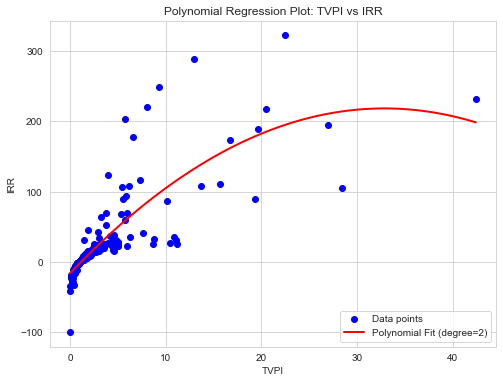

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

# Load the data (assumes the data is loaded from the file correctly)
file_path = 'Funds_Relationship_Explorer-8.xlsx'
data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')

# Ensure both columns have the same length after dropping NaNs
x = data['TVPI (Y)'].dropna()
y = data['IRR (X)'].dropna()

# Align the data to ensure both x and y have the same length
x, y = x.align(y, join='inner')

# Fit a second-degree polynomial (quadratic) to the data
poly_coeffs = np.polyfit(x, y, 2)
poly_model = np.poly1d(poly_coeffs)

# Generate x values for plotting the polynomial curve
x_poly = np.linspace(x.min(), x.max(), 100)
y_poly = poly_model(x_poly)

# Plotting the data and the polynomial fit
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_poly, y_poly, color='red', label='Polynomial Fit (degree=2)', linewidth=2)

# Adding titles and labels
plt.title('Polynomial Regression Plot: TVPI vs IRR')
plt.xlabel('TVPI')
plt.ylabel('IRR')

# Add a legend
plt.legend(loc='lower right')

# Show plot
plt.show()

Cluster 0: 12.12% of data points
Cluster 1: 83.33% of data points
Cluster 2: 4.55% of data points


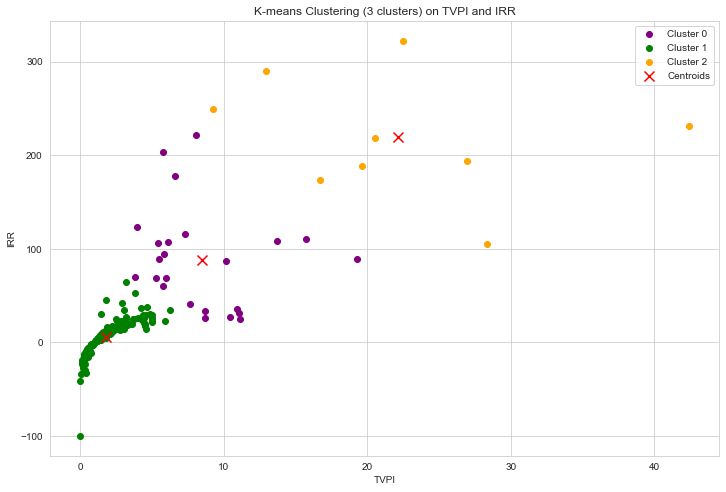

+-------------------------+---------+
| Description             | Value   |
+=========================+=========+
| Total Data Points       | 198     |
+-------------------------+---------+
| Data Points > 10 (TVPI) | 16      |
+-------------------------+---------+
| Percentage > 10 (TVPI)  | 8.08%   |
+-------------------------+---------+


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

# Set up the plot style
sns.set_style("whitegrid")

# Load the data with error handling
file_path = 'Funds_Relationship_Explorer-8.xlsx'
try:
    data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# Prepare the data by selecting relevant columns and dropping missing values
X = data[['IRR (X)', 'TVPI (Y)']].dropna()
if X.empty:
    print("Error: No data available after dropping missing values.")
    exit()

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with specified n_init to avoid warnings
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original data
clusters = kmeans.labels_
X['Cluster'] = clusters

# Calculate the percentage of points in each cluster
cluster_counts = np.bincount(clusters)
cluster_percentages = (cluster_counts / len(clusters)) * 100

# Print the percentage in each cluster
for i, percentage in enumerate(cluster_percentages):
    print(f"Cluster {i}: {percentage:.2f}% of data points")

# Define color map for clusters
cluster_colors = {0: 'purple', 1: 'green', 2: 'orange'}

# Plotting the data with clusters
plt.figure(figsize=(12, 8))

# Create scatter plot for each cluster
for cluster in cluster_colors:
    subset = X[X['Cluster'] == cluster]
    plt.scatter(subset['TVPI (Y)'], subset['IRR (X)'], label=f'Cluster {cluster}', color=cluster_colors[cluster])

# Inverse transform the centroids to original scale for plotting
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 1], centroids[:, 0], color='red', marker='x', s=100, label='Centroids')

# Add titles and labels
plt.title('K-means Clustering (3 clusters) on TVPI and IRR')
plt.xlabel('TVPI')
plt.ylabel('IRR')
plt.legend()

# Show plot
plt.show()

# Calculate the number and percentage of data points where TVPI (Y) is greater than 10
greater_than_10_count = (X['TVPI (Y)'] > 10).sum()
total_points = len(X)
percentage_greater_than_10 = (greater_than_10_count / total_points) * 100

# Display the results in a table format with 2 decimal places
table_data = [
    ["Total Data Points", total_points],
    ["Data Points > 10 (TVPI)", greater_than_10_count],
    ["Percentage > 10 (TVPI)", f"{percentage_greater_than_10:.2f}%"]
]

# Print table
print(tabulate(table_data, headers=["Description", "Value"], tablefmt="grid"))

Cluster 0: 12.12% of data points
Cluster 1: 83.33% of data points
Cluster 2: 4.55% of data points

Average TVPI for the entire dataset: 3.56

Average TVPI for each cluster:
Cluster 0: 8.46
Cluster 1: 1.83
Cluster 2: 22.14

Average TVPI without cluster 0: 2.88
Average TVPI without cluster 2: 2.67


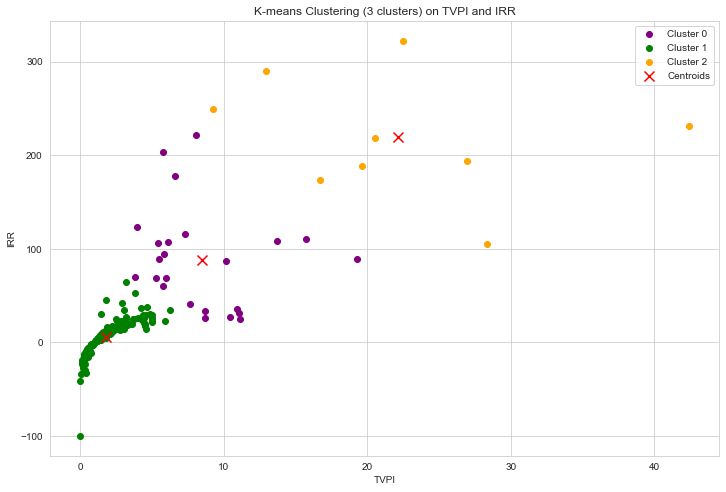

+-------------------------+---------+
| Description             | Value   |
+=========================+=========+
| Total Data Points       | 198     |
+-------------------------+---------+
| Data Points > 10 (TVPI) | 16      |
+-------------------------+---------+
| Percentage > 10 (TVPI)  | 8.08%   |
+-------------------------+---------+


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

# Set up the plot style
sns.set_style("whitegrid")

# Load the data with error handling
file_path = 'Funds_Relationship_Explorer-8.xlsx'
try:
    data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# Prepare the data by selecting relevant columns and dropping missing values
X = data[['IRR (X)', 'TVPI (Y)']].dropna()
if X.empty:
    print("Error: No data available after dropping missing values.")
    exit()

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with specified n_init to avoid warnings
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original data
clusters = kmeans.labels_
X['Cluster'] = clusters

# Calculate the percentage of points in each cluster
cluster_counts = np.bincount(clusters)
cluster_percentages = (cluster_counts / len(clusters)) * 100

# Print the percentage in each cluster
for i, percentage in enumerate(cluster_percentages):
    print(f"Cluster {i}: {percentage:.2f}% of data points")

# **New code starts here**

# 1. Print the average TVPI for the entire dataset and each cluster.

# Calculate the average TVPI for the entire dataset
average_tvpi_total = X['TVPI (Y)'].mean()

# Calculate the average TVPI for each cluster
cluster_tvpi_averages = X.groupby('Cluster')['TVPI (Y)'].mean()

# Print the average TVPI for the entire dataset
print(f"\nAverage TVPI for the entire dataset: {average_tvpi_total:.2f}")

# Print the average TVPI for each cluster
print("\nAverage TVPI for each cluster:")
for cluster, avg_tvpi in cluster_tvpi_averages.items():
    print(f"Cluster {cluster}: {avg_tvpi:.2f}")

# 2. Print the average TVPI without cluster 0 and without cluster 2.

# Average TVPI without cluster 0
X_no_cluster_0 = X[X['Cluster'] != 0]
average_tvpi_no_cluster_0 = X_no_cluster_0['TVPI (Y)'].mean()
print(f"\nAverage TVPI without cluster 0: {average_tvpi_no_cluster_0:.2f}")

# Average TVPI without cluster 2
X_no_cluster_2 = X[X['Cluster'] != 2]
average_tvpi_no_cluster_2 = X_no_cluster_2['TVPI (Y)'].mean()
print(f"Average TVPI without cluster 2: {average_tvpi_no_cluster_2:.2f}")

# **End of new code**

# Define color map for clusters
cluster_colors = {0: 'purple', 1: 'green', 2: 'orange'}

# Plotting the data with clusters
plt.figure(figsize=(12, 8))

# Create scatter plot for each cluster
for cluster in cluster_colors:
    subset = X[X['Cluster'] == cluster]
    plt.scatter(subset['TVPI (Y)'], subset['IRR (X)'], label=f'Cluster {cluster}', color=cluster_colors[cluster])

# Inverse transform the centroids to original scale for plotting
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 1], centroids[:, 0], color='red', marker='x', s=100, label='Centroids')

# Add titles and labels
plt.title('K-means Clustering (3 clusters) on TVPI and IRR')
plt.xlabel('TVPI')
plt.ylabel('IRR')
plt.legend()

# Show plot
plt.show()

# Calculate the number and percentage of data points where TVPI (Y) is greater than 10
greater_than_10_count = (X['TVPI (Y)'] > 10).sum()
total_points = len(X)
percentage_greater_than_10 = (greater_than_10_count / total_points) * 100

# Display the results in a table format with 2 decimal places
table_data = [
    ["Total Data Points", total_points],
    ["Data Points > 10 (TVPI)", greater_than_10_count],
    ["Percentage > 10 (TVPI)", f"{percentage_greater_than_10:.2f}%"]
]

# Print table
print(tabulate(table_data, headers=["Description", "Value"], tablefmt="grid"))

Cluster 0: 12.12% of data points
Cluster 1: 83.33% of data points
Cluster 2: 4.55% of data points

Average TVPI for the entire dataset: 3.56

Average TVPI for each cluster:
Cluster 0: 8.46
Cluster 1: 1.83
Cluster 2: 22.14

Average TVPI without cluster 0: 2.88
Average TVPI without cluster 2: 2.67

Average TVPI without data points where TVPI (Y) > 10: 2.26


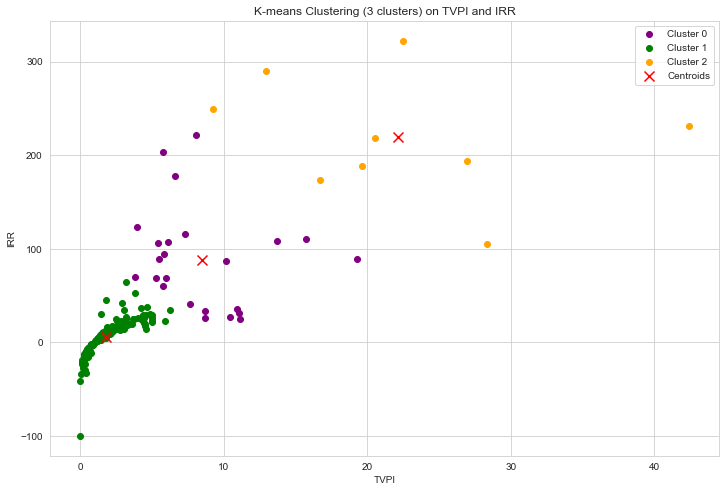

+-------------------------+---------+
| Description             | Value   |
+=========================+=========+
| Total Data Points       | 198     |
+-------------------------+---------+
| Data Points > 10 (TVPI) | 16      |
+-------------------------+---------+
| Percentage > 10 (TVPI)  | 8.08%   |
+-------------------------+---------+


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

# Set up the plot style
sns.set_style("whitegrid")

# Load the data with error handling
file_path = 'Funds_Relationship_Explorer-8.xlsx'
try:
    data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# Prepare the data by selecting relevant columns and dropping missing values
X = data[['IRR (X)', 'TVPI (Y)']].dropna()
if X.empty:
    print("Error: No data available after dropping missing values.")
    exit()

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with specified n_init to avoid warnings
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original data
clusters = kmeans.labels_
X['Cluster'] = clusters

# Calculate the percentage of points in each cluster
cluster_counts = np.bincount(clusters)
cluster_percentages = (cluster_counts / len(clusters)) * 100

# Print the percentage in each cluster
for i, percentage in enumerate(cluster_percentages):
    print(f"Cluster {i}: {percentage:.2f}% of data points")

# **New code starts here**

# 1. Print the average TVPI for the entire dataset and each cluster.

# Calculate the average TVPI for the entire dataset
average_tvpi_total = X['TVPI (Y)'].mean()

# Calculate the average TVPI for each cluster
cluster_tvpi_averages = X.groupby('Cluster')['TVPI (Y)'].mean()

# Print the average TVPI for the entire dataset
print(f"\nAverage TVPI for the entire dataset: {average_tvpi_total:.2f}")

# Print the average TVPI for each cluster
print("\nAverage TVPI for each cluster:")
for cluster, avg_tvpi in cluster_tvpi_averages.items():
    print(f"Cluster {cluster}: {avg_tvpi:.2f}")

# 2. Print the average TVPI without cluster 0 and without cluster 2.

# Average TVPI without cluster 0
X_no_cluster_0 = X[X['Cluster'] != 0]
average_tvpi_no_cluster_0 = X_no_cluster_0['TVPI (Y)'].mean()
print(f"\nAverage TVPI without cluster 0: {average_tvpi_no_cluster_0:.2f}")

# Average TVPI without cluster 2
X_no_cluster_2 = X[X['Cluster'] != 2]
average_tvpi_no_cluster_2 = X_no_cluster_2['TVPI (Y)'].mean()
print(f"Average TVPI without cluster 2: {average_tvpi_no_cluster_2:.2f}")

# 3. Print the average TVPI without data points where TVPI (Y) > 10.

# Filter out data points where TVPI (Y) > 10
X_filtered = X[X['TVPI (Y)'] <= 10]

# Check if there are data points left after filtering
if not X_filtered.empty:
    average_tvpi_filtered = X_filtered['TVPI (Y)'].mean()
    print(f"\nAverage TVPI without data points where TVPI (Y) > 10: {average_tvpi_filtered:.2f}")
else:
    print("\nNo data points left after excluding TVPI (Y) > 10.")

# **End of new code**

# Define color map for clusters
cluster_colors = {0: 'purple', 1: 'green', 2: 'orange'}

# Plotting the data with clusters
plt.figure(figsize=(12, 8))

# Create scatter plot for each cluster
for cluster in cluster_colors:
    subset = X[X['Cluster'] == cluster]
    plt.scatter(subset['TVPI (Y)'], subset['IRR (X)'], label=f'Cluster {cluster}', color=cluster_colors[cluster])

# Inverse transform the centroids to original scale for plotting
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 1], centroids[:, 0], color='red', marker='x', s=100, label='Centroids')

# Add titles and labels
plt.title('K-means Clustering (3 clusters) on TVPI and IRR')
plt.xlabel('TVPI')
plt.ylabel('IRR')
plt.legend()

# Show plot
plt.show()

# Calculate the number and percentage of data points where TVPI (Y) is greater than 10
greater_than_10_count = (X['TVPI (Y)'] > 10).sum()
total_points = len(X)
percentage_greater_than_10 = (greater_than_10_count / total_points) * 100

# Display the results in a table format with 2 decimal places
table_data = [
    ["Total Data Points", total_points],
    ["Data Points > 10 (TVPI)", greater_than_10_count],
    ["Percentage > 10 (TVPI)", f"{percentage_greater_than_10:.2f}%"]
]

# Print table
print(tabulate(table_data, headers=["Description", "Value"], tablefmt="grid"))

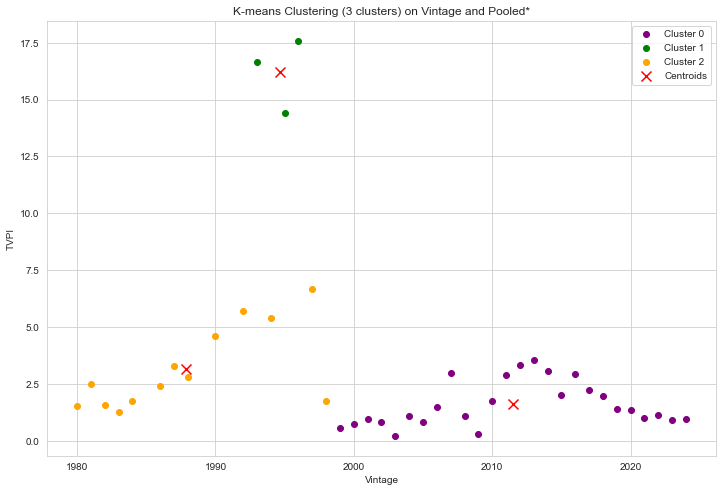

+----------------------------+---------+
| Description                | Value   |
+============================+=========+
| Total Data Points          | 42      |
+----------------------------+---------+
| Data Points > 10 (Pooled*) | 3       |
+----------------------------+---------+
| Percentage > 10 (Pooled*)  | 7.14%   |
+----------------------------+---------+


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

# Set up the plot style
sns.set_style("whitegrid")

# Load the data with error handling
file_path = 'Funds_Measure_Detail_Report-12.xlsx'
try:
    data = pd.read_excel(file_path, sheet_name=0)  # Assuming the data is in the first sheet
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# Prepare the data by selecting relevant columns ('Vintage' and 'Pooled*') and dropping missing values
X = data[['Vintage', 'Pooled*']].dropna()
if X.empty:
    print("Error: No data available after dropping missing values.")
    exit()

# Convert 'Vintage' to numeric values if necessary
X['Vintage'] = pd.to_numeric(X['Vintage'], errors='coerce')
X = X.dropna()  # Drop rows with invalid 'Vintage' values

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Vintage', 'Pooled*']])

# Perform K-means clustering with specified n_init to avoid warnings
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original data
X['Cluster'] = kmeans.labels_

# Plotting the data with clusters
plt.figure(figsize=(12, 8))

# Define color map for clusters
cluster_colors = {0: 'purple', 1: 'green', 2: 'orange'}

# Create scatter plot for each cluster based on Vintage and Pooled*
for cluster in cluster_colors:
    subset = X[X['Cluster'] == cluster]
    plt.scatter(subset['Vintage'], subset['Pooled*'], label=f'Cluster {cluster}', color=cluster_colors[cluster])

# Inverse transform the centroids to original scale for plotting
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')

# Add titles and labels
plt.title('K-means Clustering (3 clusters) on Vintage and Pooled*')
plt.xlabel('Vintage')
plt.ylabel('TVPI')
plt.legend()

# Show plot
plt.show()

# Calculate the number and percentage of data points where Pooled* is greater than 10
greater_than_10_count = (X['Pooled*'] > 10).sum()
total_points = len(X)
percentage_greater_than_10 = (greater_than_10_count / total_points) * 100

# Display the results in a table format with 2 decimal places
table_data = [
    ["Total Data Points", total_points],
    ["Data Points > 10 (Pooled*)", greater_than_10_count],
    ["Percentage > 10 (Pooled*)", f"{percentage_greater_than_10:.2f}%"]
]

# Print table
print(tabulate(table_data, headers=["Description", "Value"], tablefmt="grid"))


Vintages for Cluster 1:
[1996, 1995, 1993]


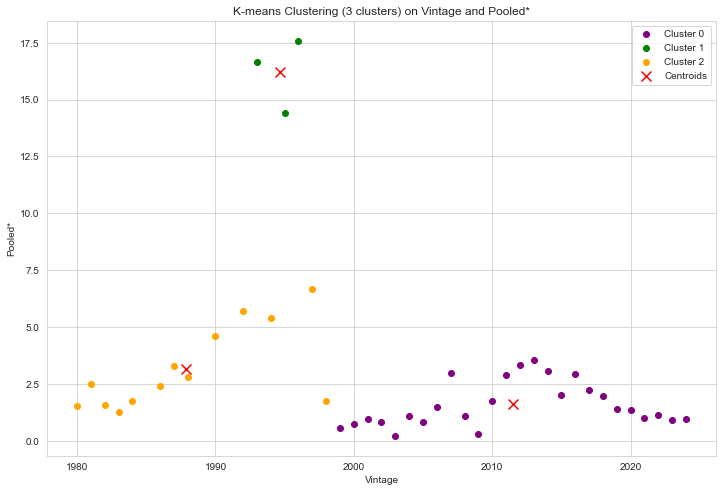

+----------------------------+---------+
| Description                | Value   |
+============================+=========+
| Total Data Points          | 42      |
+----------------------------+---------+
| Data Points > 10 (Pooled*) | 3       |
+----------------------------+---------+
| Percentage > 10 (Pooled*)  | 7.14%   |
+----------------------------+---------+


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

# Set up the plot style
sns.set_style("whitegrid")

# Load the data with error handling
file_path = 'Funds_Measure_Detail_Report-12.xlsx'
try:
    data = pd.read_excel(file_path, sheet_name=0)  # Assuming the data is in the first sheet
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# Prepare the data by selecting relevant columns ('Vintage' and 'Pooled*') and dropping missing values
X = data[['Vintage', 'Pooled*']].dropna()
if X.empty:
    print("Error: No data available after dropping missing values.")
    exit()

# Convert 'Vintage' to numeric values if necessary
X['Vintage'] = pd.to_numeric(X['Vintage'], errors='coerce')
X = X.dropna()  # Drop rows with invalid 'Vintage' values

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Vintage', 'Pooled*']])

# Perform K-means clustering with specified n_init to avoid warnings
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original data
X['Cluster'] = kmeans.labels_

# Print the vintages for cluster 1
cluster_1_vintages = X[X['Cluster'] == 1]['Vintage']
print("\nVintages for Cluster 1:")
print(cluster_1_vintages.tolist())

# Plotting the data with clusters
plt.figure(figsize=(12, 8))

# Define color map for clusters
cluster_colors = {0: 'purple', 1: 'green', 2: 'orange'}

# Create scatter plot for each cluster based on Vintage and Pooled*
for cluster in cluster_colors:
    subset = X[X['Cluster'] == cluster]
    plt.scatter(subset['Vintage'], subset['Pooled*'], label=f'Cluster {cluster}', color=cluster_colors[cluster])

# Inverse transform the centroids to original scale for plotting
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')

# Add titles and labels
plt.title('K-means Clustering (3 clusters) on Vintage and Pooled*')
plt.xlabel('Vintage')
plt.ylabel('Pooled*')
plt.legend()
plt.savefig('VintageCluster.png', dpi=600)

# Show plot
plt.show()

# Calculate the number and percentage of data points where Pooled* is greater than 10
greater_than_10_count = (X['Pooled*'] > 10).sum()
total_points = len(X)
percentage_greater_than_10 = (greater_than_10_count / total_points) * 100

# Display the results in a table format with 2 decimal places
table_data = [
    ["Total Data Points", total_points],
    ["Data Points > 10 (Pooled*)", greater_than_10_count],
    ["Percentage > 10 (Pooled*)", f"{percentage_greater_than_10:.2f}%"]
]

# Print table
print(tabulate(table_data, headers=["Description", "Value"], tablefmt="grid"))

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns
from math import comb  # For combinations

# Set up the plot style
sns.set_style("whitegrid")

# Load the data with error handling
file_path = 'Funds_Relationship_Explorer-8.xlsx'
try:
    data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# Prepare the data by selecting relevant columns and dropping missing values
X = data[['IRR (X)', 'TVPI (Y)']].dropna()
if X.empty:
    print("Error: No data available after dropping missing values.")
    exit()

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with specified n_init to avoid warnings
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original data
clusters = kmeans.labels_
X['Cluster'] = clusters

# Calculate the percentage of points in each cluster
cluster_counts = np.bincount(clusters)
cluster_percentages = (cluster_counts / len(clusters)) * 100

# Print the percentage in each cluster
for i, percentage in enumerate(cluster_percentages):
    print(f"Cluster {i}: {percentage:.2f}% of data points")

# **New code starts here**

# Total number of data points
N = len(X)

# Number of data points in Cluster 2
k_cluster_2 = cluster_counts[2]

# Number of data points in Cluster 0
k_cluster_0 = cluster_counts[0]

# Number of data points where TVPI > 10
k_tvpi_gt_10 = (X['TVPI (Y)'] > 10).sum()

print(f"\nTotal Data Points (N): {N}")
print(f"Data Points in Cluster 2 (k_cluster_2): {k_cluster_2}")
print(f"Data Points in Cluster 0 (k_cluster_0): {k_cluster_0}")
print(f"Data Points where TVPI > 10 (k_tvpi_gt_10): {k_tvpi_gt_10}")

# Function to calculate the probability
def calculate_probability(N, k, n):
    if n > N - k:
        return 0.0  # Can't miss k data points if sample size is larger than N - k
    probability = comb(N - k, n) / comb(N, n)
    return probability

# Specify the sample size(s)
sample_sizes = [10, 20, 30, 40, 50]  # You can adjust these values

# Calculate probabilities for each sample size
probability_table = []

for n in sample_sizes:
    prob_miss_cluster_2 = calculate_probability(N, k_cluster_2, n)
    prob_miss_cluster_0 = calculate_probability(N, k_cluster_0, n)
    prob_miss_tvpi_gt_10 = calculate_probability(N, k_tvpi_gt_10, n)

    probability_table.append([
        n,
        f"{prob_miss_cluster_2:.4f}",
        f"{prob_miss_cluster_0:.4f}",
        f"{prob_miss_tvpi_gt_10:.4f}"
    ])

# Display the probabilities in a table
print("\nProbability of Missing All Data Points in Specific Categories:")
print(tabulate(
    probability_table,
    headers=["Sample Size (n)", "Miss Cluster 2", "Miss Cluster 0", "Miss TVPI > 10"],
    tablefmt="grid"
))

# **End of new code**

# The rest of the code remains the same...

Cluster 0: 12.12% of data points
Cluster 1: 83.33% of data points
Cluster 2: 4.55% of data points

Total Data Points (N): 198
Data Points in Cluster 2 (k_cluster_2): 9
Data Points in Cluster 0 (k_cluster_0): 24
Data Points where TVPI > 10 (k_tvpi_gt_10): 16

Probability of Missing All Data Points in Specific Categories:
+-------------------+------------------+------------------+------------------+
|   Sample Size (n) |   Miss Cluster 2 |   Miss Cluster 0 |   Miss TVPI > 10 |
+===================+==================+==================+==================+
|                10 |           0.621  |           0.2659 |           0.4218 |
+-------------------+------------------+------------------+------------------+
|                20 |           0.3755 |           0.0654 |           0.1693 |
+-------------------+------------------+------------------+------------------+
|                30 |           0.2204 |           0.0148 |           0.0643 |
+-------------------+------------------+------

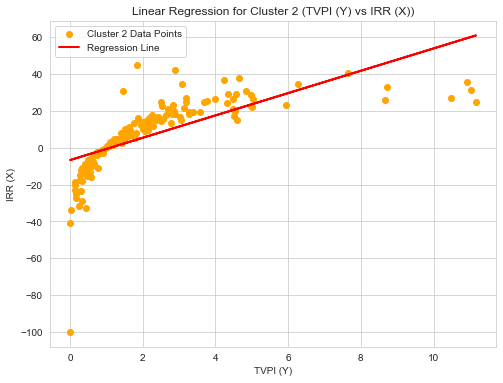

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| R2        |    0.48 |
+-----------+---------+
| Intercept |   -6.73 |
+-----------+---------+
| Slope     |    6.06 |
+-----------+---------+


In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tabulate import tabulate  # For displaying data in table format
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

# Load the data
file_path = 'Funds_Relationship_Explorer-8.xlsx'
data = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')

# Prepare the data for K-means clustering using both 'IRR (X)' and 'TVPI (Y)' columns
X = data[['IRR (X)', 'TVPI (Y)']].dropna()  # Remove rows with missing values

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Get the cluster labels
clusters = kmeans.labels_

# Filter the data to include only points in Cluster 2
cluster_2_data = X[clusters == 2]

# Run a linear regression on Cluster 2 data
X_cluster_2 = cluster_2_data['TVPI (Y)'].values.reshape(-1, 1)  # TVPI (Y) as independent variable
y_cluster_2 = cluster_2_data['IRR (X)'].values  # IRR (X) as dependent variable

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_cluster_2, y_cluster_2)

# Predict values for plotting the regression line
y_pred_cluster_2 = regression_model.predict(X_cluster_2)

# Calculate R2
r2 = r2_score(y_cluster_2, y_pred_cluster_2)

# Plot the regression line with the original data points from Cluster 2
plt.figure(figsize=(8, 6))
plt.scatter(X_cluster_2, y_cluster_2, color='orange', label='Cluster 2 Data Points')
plt.plot(X_cluster_2, y_pred_cluster_2, color='red', label='Regression Line', linewidth=2)

# Adding titles and labels
plt.title('Linear Regression for Cluster 2 (TVPI (Y) vs IRR (X))')
plt.xlabel('TVPI (Y)')
plt.ylabel('IRR (X)')
plt.legend()

# Show plot
plt.show()

# Prepare the output
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

output = [
    ["Metric", "Value"],
    ["R2", f"{r2:.2f}"],
    ["Intercept", f"{intercept:.2f}"],
    ["Slope", f"{slope:.2f}"]
]

# Print the results in a tabular format
print(tabulate(output, headers="firstrow", tablefmt="grid"))

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the Adult dataset
# Note: This dataset has a Creative Commons 4.0 license.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)
df.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split the data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Captain Certainty: A single, overconfident tree (overfits the data)
cpt_c = RandomForestClassifier(n_estimators=1, max_features=None, max_depth=100, random_state=42, bootstrap=False)
cpt_c.fit(X_train, y_train)
y_pred_cpt_c = cpt_c.predict(X_test)
print(f"Captain Certainty's Accuracy: {accuracy_score(y_test, y_pred_cpt_c):.2f}")

# The diverse team: A Random Forest with 3 weak learners (the interns)
diverse_team = RandomForestClassifier(n_estimators=3, max_depth=10, random_state=42)
diverse_team.fit(X_train, y_train)
y_pred_team = diverse_team.predict(X_test)
print(f"Intern Team's Accuracy: {accuracy_score(y_test, y_pred_team):.2f}")

# Optionally, add more interns to see performance gains
# extended_team = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
# extended_team.fit(X_train, y_train)
# y_pred_extended = extended_team.predict(X_test)
# print(f"Extended Intern Team's Accuracy: {accuracy_score(y_test, y_pred_extended):.2f}")

Captain Certainty's Accuracy: 0.80
Intern Team's Accuracy: 0.85


Captain Certainty's Accuracy: 0.80
Intern Team's Accuracy: 0.85


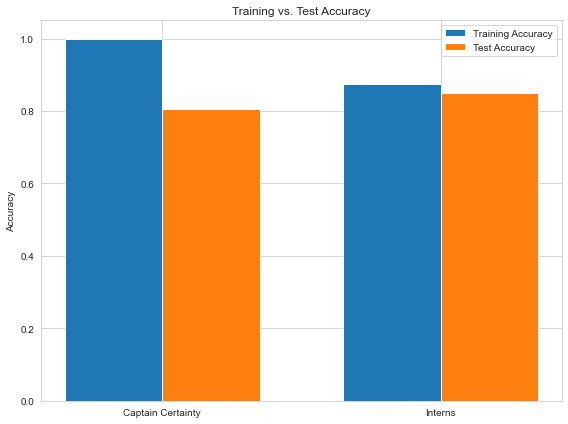

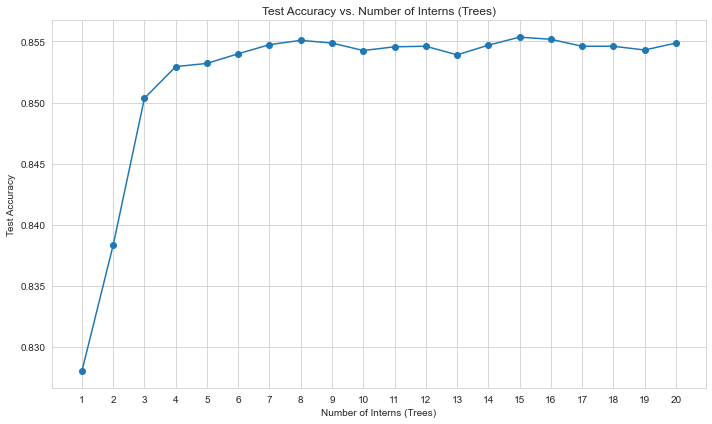

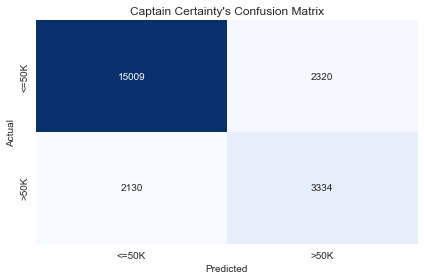

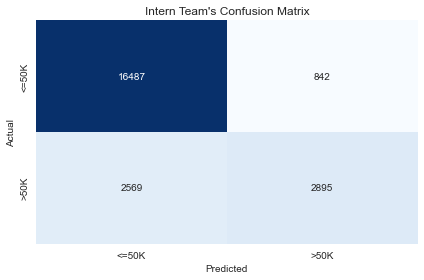

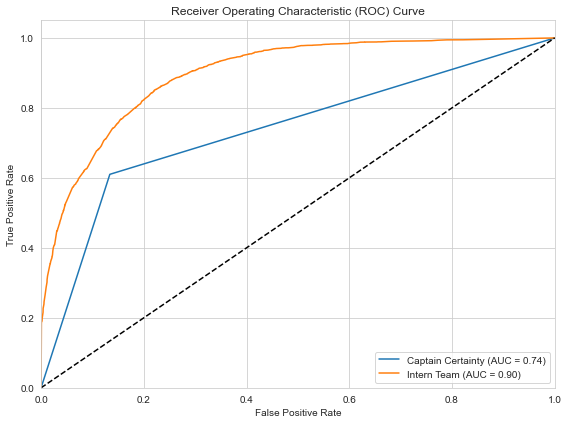

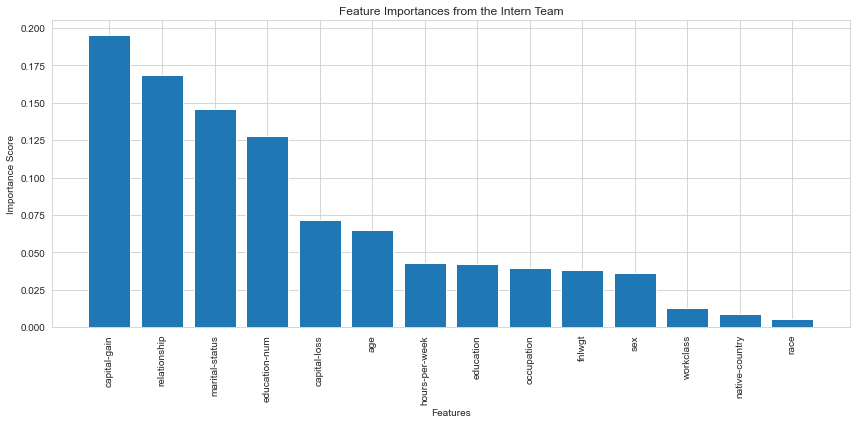

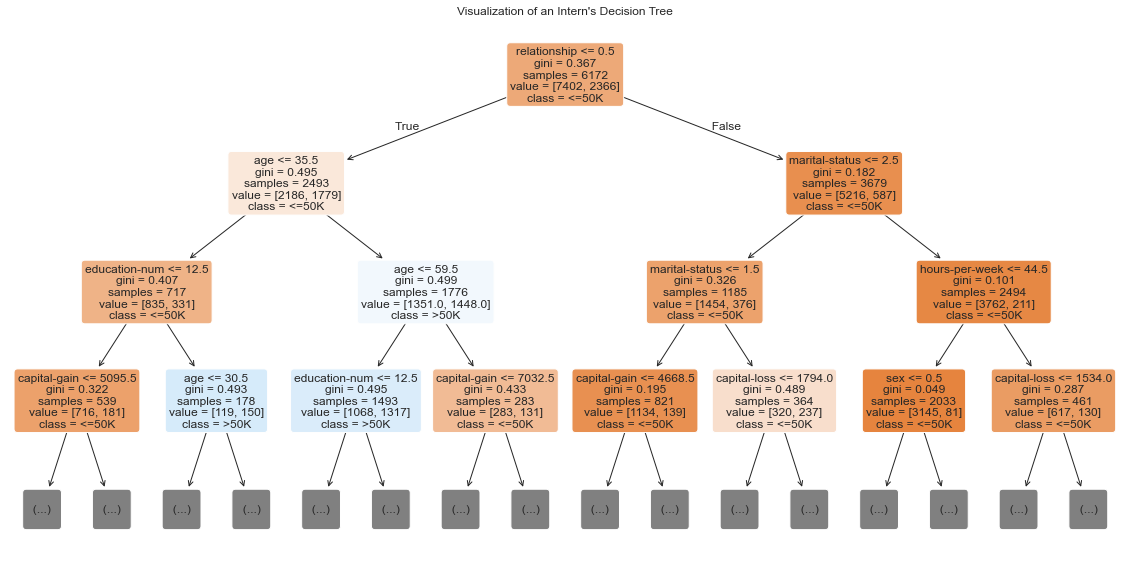

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.tree import plot_tree

# Load the Adult dataset
# Note this has a Creative Commons 4.0 license. More details here: https://archive.ics.uci.edu/dataset/2/adult
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(
    url,
    names=columns,
    na_values=' ?',
    skipinitialspace=True
)
df.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split the data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42
)

# Captain Certainty: A single, overconfident tree (overfits the data)
cpt_c = RandomForestClassifier(
    n_estimators=1,
    max_features=None,
    max_depth=100,
    random_state=42,
    bootstrap=False
)
cpt_c.fit(X_train, y_train)
y_pred_cpt_c = cpt_c.predict(X_test)
print(f"Captain Certainty's Accuracy: {accuracy_score(y_test, y_pred_cpt_c):.2f}")

# The Interns: A Random Forest with 3 weak learners
diverse_team = RandomForestClassifier(
    n_estimators=3,
    max_depth=10,
    random_state=42
)
diverse_team.fit(X_train, y_train)
y_pred_team = diverse_team.predict(X_test)
print(f"Intern Team's Accuracy: {accuracy_score(y_test, y_pred_team):.2f}")

# ==========================================
# Visualization Code Below
# ==========================================

# 1. Training vs. Test Accuracy
# ------------------------------------------

# Get training accuracy for Captain Certainty
train_pred_cpt_c = cpt_c.predict(X_train)
train_acc_cpt_c = accuracy_score(y_train, train_pred_cpt_c)
test_acc_cpt_c = accuracy_score(y_test, y_pred_cpt_c)

# Get training accuracy for the Interns
train_pred_team = diverse_team.predict(X_train)
train_acc_team = accuracy_score(y_train, train_pred_team)
test_acc_team = accuracy_score(y_test, y_pred_team)

# Plotting Training vs. Test Accuracy
models = ['Captain Certainty', 'Interns']
train_accuracies = [train_acc_cpt_c, train_acc_team]
test_accuracies = [test_acc_cpt_c, test_acc_team]

x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, train_accuracies, width=bar_width, label='Training Accuracy', align='center')
plt.bar(x + bar_width, test_accuracies, width=bar_width, label='Test Accuracy', align='center')
plt.xticks(x + bar_width / 2, models)
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Accuracy vs. Number of Interns (Trees)
# ------------------------------------------

test_accuracies = []
n_estimators_list = range(1, 21)  # Number of interns from 1 to 20

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=10,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(test_acc)

# Plotting Accuracy vs. Number of Interns
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.title('Test Accuracy vs. Number of Interns (Trees)')
plt.xlabel('Number of Interns (Trees)')
plt.ylabel('Test Accuracy')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Confusion Matrices
# ------------------------------------------

# Confusion matrix for Captain Certainty
cm_cpt_c = confusion_matrix(y_test, y_pred_cpt_c)
# Confusion matrix for the Interns
cm_team = confusion_matrix(y_test, y_pred_team)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['<=50K', '>50K'],
        yticklabels=['<=50K', '>50K']
    )
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(cm_cpt_c, "Captain Certainty's Confusion Matrix")
plot_confusion_matrix(cm_team, "Intern Team's Confusion Matrix")

# 4. ROC Curves and AUC Scores
# ------------------------------------------

# Get probability predictions
y_score_cpt_c = cpt_c.predict_proba(X_test)[:, 1]
y_score_team = diverse_team.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Captain Certainty
fpr_cpt_c, tpr_cpt_c, _ = roc_curve(y_test, y_score_cpt_c)
roc_auc_cpt_c = auc(fpr_cpt_c, tpr_cpt_c)

# Compute ROC curve and AUC for the Interns
fpr_team, tpr_team, _ = roc_curve(y_test, y_score_team)
roc_auc_team = auc(fpr_team, tpr_team)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_cpt_c, tpr_cpt_c, label=f'Captain Certainty (AUC = {roc_auc_cpt_c:.2f})')
plt.plot(fpr_team, tpr_team, label=f'Intern Team (AUC = {roc_auc_team:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line represents random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Feature Importances
# ------------------------------------------

# Get feature importances from the Interns (Random Forest)
importances = diverse_team.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plotting Feature Importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances from the Intern Team')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# 6. Visualizing Decision Trees Using plot_tree
# ------------------------------------------

# Visualize one of the intern's decision trees using plot_tree
estimator = diverse_team.estimators_[0]  # Select the first tree

plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=['<=50K', '>50K'],
    filled=True,
    rounded=True,
    fontsize=12,
    max_depth=3  # Limit depth for visualization clarity
)
plt.title("Visualization of an Intern's Decision Tree")
plt.show()

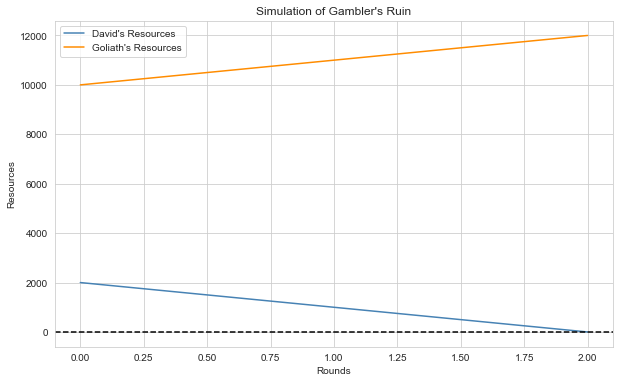

David's Starting Resources: 2000
Goliath's Starting Resources: 10000
David's Win Probability Per Round: 0.55
Cost Per Round: $1000
Theoretical Win Probability: 36.33%
Empirical Win Probability after 10000 simulations: 36.32%


In [36]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_david_win_probability(david_resources, goliath_resources, david_win_prob, cost_per_round):
    # Convert the resources to multiples of cost per round
    D = david_resources // cost_per_round
    G = goliath_resources // cost_per_round
    p = david_win_prob
    q = 1 - p

    if p == q:
        # Fair game: probability proportional to initial resources
        return D / (D + G)
    else:
        # Unfair game: using the Gambler's Ruin formula
        r = q / p
        numerator = 1 - r ** D
        denominator = 1 - r ** (D + G)
        return numerator / denominator

def simulate_game(david_resources, goliath_resources, david_win_prob, cost_per_round):
    # Initialize resources
    david_current = david_resources
    goliath_current = goliath_resources

    # Track resource history
    david_history = [david_current]
    goliath_history = [goliath_current]

    # Simulate rounds until one player runs out of resources
    while david_current >= cost_per_round and goliath_current >= cost_per_round:
        if np.random.rand() < david_win_prob:
            # David wins the round
            david_current += cost_per_round
            goliath_current -= cost_per_round
        else:
            # Goliath wins the round
            david_current -= cost_per_round
            goliath_current += cost_per_round

        # Record the current resources
        david_history.append(david_current)
        goliath_history.append(goliath_current)

    # Determine the winner
    winner = 'David' if david_current >= cost_per_round else 'Goliath'
    return winner, david_history, goliath_history

def simulate_multiple_games(num_simulations, david_resources, goliath_resources, david_win_prob, cost_per_round):
    david_wins = 0
    for _ in range(num_simulations):
        winner, _, _ = simulate_game(david_resources, goliath_resources, david_win_prob, cost_per_round)
        if winner == 'David':
            david_wins += 1
    return david_wins / num_simulations

# Parameters
david_resources = 2000
goliath_resources = 10000
david_win_prob = 0.55
cost_per_round = 1000

# Calculate theoretical win probability
theoretical_win_prob = calculate_david_win_probability(
    david_resources, goliath_resources, david_win_prob, cost_per_round
)

# Simulate multiple games to estimate empirical win probability
num_simulations = 10000
empirical_win_prob = simulate_multiple_games(
    num_simulations, david_resources, goliath_resources, david_win_prob, cost_per_round
)

# Simulate a single game for resource history visualization
winner, david_history, goliath_history = simulate_game(
    david_resources, goliath_resources, david_win_prob, cost_per_round
)

# Plot resource histories
plt.figure(figsize=(10, 6))
plt.plot(david_history, label="David's Resources", color='steelblue')
plt.plot(goliath_history, label="Goliath's Resources", color='darkorange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Simulation of Gambler's Ruin")
plt.xlabel("Rounds")
plt.ylabel("Resources")
plt.legend()
plt.grid(True)
plt.show()

# Display parameters and probabilities
print(f"David's Starting Resources: {david_resources}")
print(f"Goliath's Starting Resources: {goliath_resources}")
print(f"David's Win Probability Per Round: {david_win_prob:.2f}")
print(f"Cost Per Round: ${cost_per_round}")
print(f"Theoretical Win Probability: {theoretical_win_prob:.2%}")
print(f"Empirical Win Probability after {num_simulations} simulations: {empirical_win_prob:.2%}")

In [10]:
import numpy as np

# Re-defining the UQ and AVG data with the newly extracted data

UQ = [2.10, 2.20, 2.18, 2.05, 3.07, 2.04, 3.13, 2.65, 2.99, 3.02, 2.92, 3.18, 3.58,
      5.38, 4.28, 5.23, 3.33, 1.66, 1.15, 1.32, 1.67, 1.39, 1.80, 1.84, 1.85, 2.06,
      2.62, 2.78, 2.65, 3.77, 3.82, 3.87, 3.34, 3.69, 3.08, 2.80, 2.63, 2.17, 1.82,
      1.35, 1.05, 0.99, 0.92]

AVG = [1.76, 1.82, 1.98, 1.79, 2.72, 2.89, 2.68, 2.62, 2.59, 3.21, 2.51, 3.07, 4.17,
       5.90, 5.19, 5.82, 3.02, 1.94, 0.94, 1.00, 1.26, 1.08, 1.74, 1.64, 1.93, 1.95,
       2.52, 2.19, 2.30, 3.88, 3.76, 3.65, 2.87, 3.01, 2.32, 2.35, 2.18, 1.89, 1.47,
       1.24, 0.99, 0.96, 0.92]

# Calculating the average of UQ and AVG columns
avg_UQ = np.mean(UQ)
avg_AVG = np.mean(AVG)

avg_UQ, avg_AVG

(np.float64(2.5911627906976746), np.float64(2.45860465116279))

In [11]:
# Importing numpy again since environment might have been reset
import numpy as np

# Re-defining the UQ and AVG data with the newly extracted data

UQ = [2.10, 2.20, 2.18, 2.05, 3.07, 2.04, 3.13, 2.65, 2.99, 3.02, 2.92, 3.18, 3.58,
      5.38, 4.28, 5.23, 3.33, 1.66, 1.15, 1.32, 1.67, 1.39, 1.80, 1.84, 1.85, 2.06,
      2.62, 2.78, 2.65, 3.77, 3.82, 3.87, 3.34, 3.69, 3.08, 2.80, 2.63, 2.17, 1.82,
      1.35, 1.05, 0.99, 0.92]

AVG = [1.76, 1.82, 1.98, 1.79, 2.72, 2.89, 2.68, 2.62, 2.59, 3.21, 2.51, 3.07, 4.17,
       5.90, 5.19, 5.82, 3.02, 1.94, 0.94, 1.00, 1.26, 1.08, 1.74, 1.64, 1.93, 1.95,
       2.52, 2.19, 2.30, 3.88, 3.76, 3.65, 2.87, 3.01, 2.32, 2.35, 2.18, 1.89, 1.47,
       1.24, 0.99, 0.96, 0.92]

# Calculating the standard deviation of UQ and AVG columns
std_UQ = np.std(UQ)
std_AVG = np.std(AVG)

std_UQ, std_AVG

(np.float64(1.0470583584773718), np.float64(1.199252832111396))

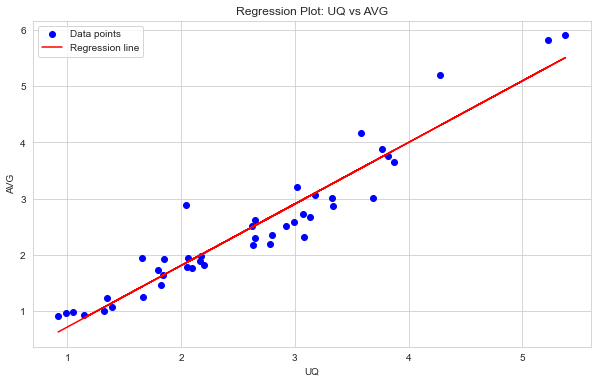

0.911118036252229

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshaping the UQ data to fit the model
UQ = np.array(UQ).reshape(-1, 1)
AVG = np.array(AVG)

# Creating a linear regression model
model = LinearRegression()
model.fit(UQ, AVG)

# Predicting the AVG values based on UQ
AVG_pred = model.predict(UQ)

# Calculating the R2 value
r2 = r2_score(AVG, AVG_pred)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(UQ, AVG, color='blue', label='Data points')
plt.plot(UQ, AVG_pred, color='red', label='Regression line')
plt.xlabel('UQ')
plt.ylabel('AVG')
plt.title('Regression Plot: UQ vs AVG')
plt.legend()

# Save the plot as a file
plt.savefig('UQvsAVG.png', dpi=600)

plt.show()

# Printing the R2 value
r2

In [15]:
import numpy as np
from scipy import stats

# Re-defining the UQ and AVG data with the newly extracted data

UQ = [2.10, 2.20, 2.18, 2.05, 3.07, 2.04, 3.13, 2.65, 2.99, 3.02, 2.92, 3.18, 3.58,
      5.38, 4.28, 5.23, 3.33, 1.66, 1.15, 1.32, 1.67, 1.39, 1.80, 1.84, 1.85, 2.06,
      2.62, 2.78, 2.65, 3.77, 3.82, 3.87, 3.34, 3.69, 3.08, 2.80, 2.63, 2.17, 1.82,
      1.35, 1.05, 0.99, 0.92]

AVG = [1.76, 1.82, 1.98, 1.79, 2.72, 2.89, 2.68, 2.62, 2.59, 3.21, 2.51, 3.07, 4.17,
       5.90, 5.19, 5.82, 3.02, 1.94, 0.94, 1.00, 1.26, 1.08, 1.74, 1.64, 1.93, 1.95,
       2.52, 2.19, 2.30, 3.88, 3.76, 3.65, 2.87, 3.01, 2.32, 2.35, 2.18, 1.89, 1.47,
       1.24, 0.99, 0.96, 0.92]

# Performing a two-sample t-test to check the significance of the difference between UQ and AVG
t_statistic, p_value = stats.ttest_ind(UQ, AVG)

# Printing the results with 2 decimal places
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpretation
if p_value < 0.05:
    print("The difference between UQ and AVG is statistically significant (p < 0.05).")
else:
    print("The difference between UQ and AVG is not statistically significant (p >= 0.05).")

T-statistic: 0.54
P-value: 0.59
The difference between UQ and AVG is not statistically significant (p >= 0.05).


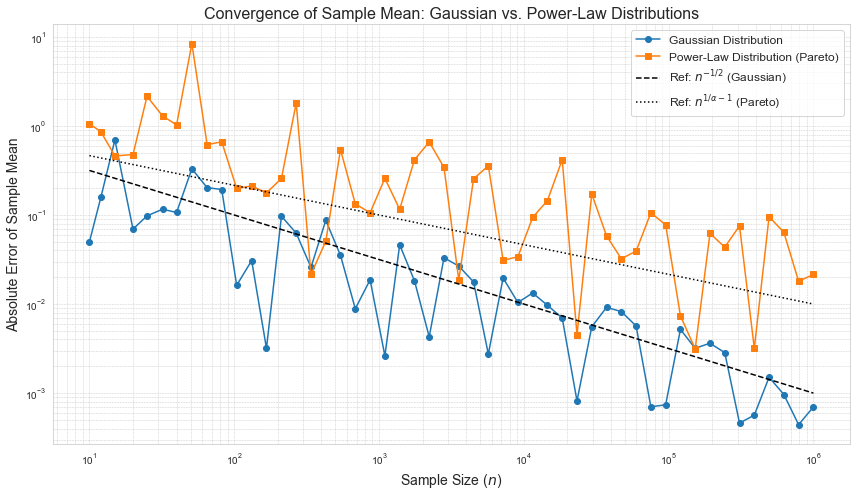

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(12)

# Define sample sizes (from 10^1 to 10^6)
sample_sizes = np.logspace(1, 6, num=50, dtype=int)

# True means
gaussian_mean = 0  # Mean of the standard normal distribution
pareto_alpha = 1.5  # Alpha parameter for the Pareto distribution
pareto_mean = pareto_alpha / (pareto_alpha - 1)  # Mean of the Pareto distribution

# Lists to store absolute errors
gaussian_errors = []
pareto_errors = []

# Simulation for Gaussian distribution
for n in sample_sizes:
    samples = np.random.normal(loc=gaussian_mean, scale=1, size=n)
    sample_mean = np.mean(samples)
    error = np.abs(sample_mean - gaussian_mean)
    gaussian_errors.append(error)

# Simulation for Pareto distribution
for n in sample_sizes:
    samples = np.random.pareto(a=pareto_alpha, size=n) + 1  # Shift to start from x=1
    sample_mean = np.mean(samples)
    error = np.abs(sample_mean - pareto_mean)
    pareto_errors.append(error)

# Plotting the results
plt.figure(figsize=(12, 7))

# Plot absolute errors
plt.loglog(sample_sizes, gaussian_errors, 'o-', label='Gaussian Distribution')
plt.loglog(sample_sizes, pareto_errors, 's-', label='Power-Law Distribution (Pareto)')

# Reference lines for expected convergence rates
n = np.array(sample_sizes)
gaussian_ref = 1 / np.sqrt(n)  # Convergence rate for Gaussian
pareto_ref = n**(1/pareto_alpha - 1)  # Convergence rate for Pareto

plt.loglog(n, gaussian_ref, 'k--', label=r'Ref: $n^{-1/2}$ (Gaussian)')
plt.loglog(n, pareto_ref, 'k:', label=r'Ref: $n^{1/\alpha - 1}$ (Pareto)')

plt.xlabel('Sample Size ($n$)', fontsize=14)
plt.ylabel('Absolute Error of Sample Mean', fontsize=14)
plt.title('Convergence of Sample Mean: Gaussian vs. Power-Law Distributions', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

# Save the plot as a file
plt.savefig('ConvergencSampleMean.png', dpi=600)

plt.show()

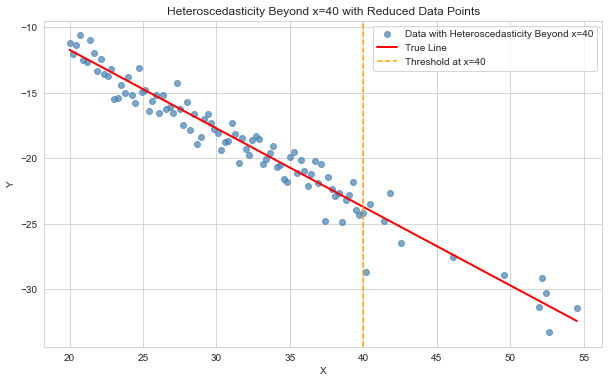

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1866.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.06e-64
Time:                        12:27:18   Log-Likelihood:                -147.06
No. Observations:                  98   AIC:                             298.1
Df Residuals:                      96   BIC:                             303.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0617      0.454     -0.136      0.8

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

# Set random seed for reproducibility
np.random.seed(42)

# Generate X values
x = np.linspace(20, 55, 150)

# True relationship (y = mx + b)
m = -0.6
b = 0.28
y_true = m * x + b

# Homoscedastic noise before threshold x=40
noise_homo = np.random.normal(0, 1, size=x.shape)

# Heteroscedastic noise after threshold x=40 (variance increases)
threshold = 40
noise = np.where(x < threshold, noise_homo, np.random.normal(0, 0.06 * x, size=x.shape))

# Generate y values with noise
y = y_true + noise

# Reduce the number of data points after x=40
# Identify indices where x >= 40
indices_after = np.where(x >= threshold)[0]
n_after = len(indices_after)
# Reduce the number of data points after x=40 by a factor
reduction_factor = 0.2  # Keep only 20% of data points after x=40
n_keep_after = max(1, int(n_after * reduction_factor))
# Randomly select indices to keep
selected_indices_after = np.random.choice(indices_after, size=n_keep_after, replace=False)

# Indices where x < 40
indices_before = np.where(x < threshold)[0]

# Combine indices to keep
indices_to_keep = np.concatenate([indices_before, selected_indices_after])
indices_to_keep.sort()

# Update x, y, y_true, noise, etc.
x = x[indices_to_keep]
y = y[indices_to_keep]
y_true = y_true[indices_to_keep]
noise = noise[indices_to_keep]

# Add constant for statsmodels OLS
X = sm.add_constant(x)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data with Heteroscedasticity Beyond x=40", color="steelblue", alpha=0.7)
plt.plot(x, y_true, color="red", label="True Line", linewidth=2)
plt.axvline(x=threshold, color='orange', linestyle='--', label='Threshold at x=40')
plt.title("Heteroscedasticity Beyond x=40 with Reduced Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Show model summary
model_summary = model.summary()
print(model_summary)

Calculating best minimal value for power law fit
alpha = 2.73, sigma = 0.32
Estimated xmin = 4.26
KS test p-value = 0.08


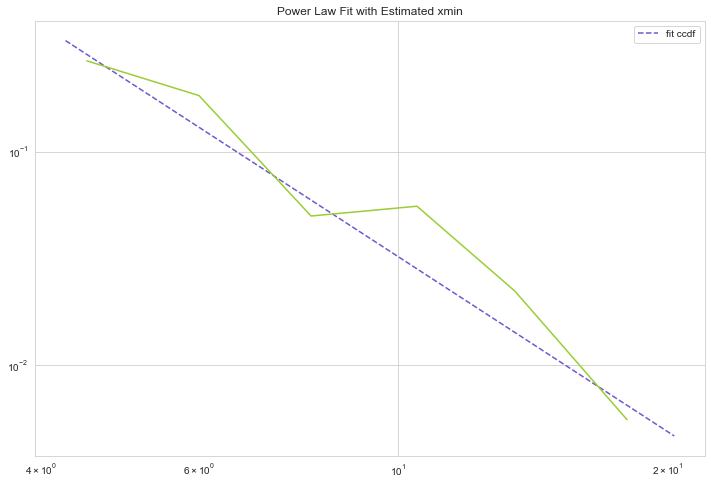

In [16]:
import pandas as pd
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

# Load the Excel file
file_path = 'Funds_Relationship_Explorer-16.xlsx'

# Load the specific sheet containing the data
df = pd.read_excel(file_path, sheet_name='Funds Relationship Explorer')

# Extract the TVPI (Y) column and drop NaN values
tvpi = df['TVPI (Y)'].dropna()

# Convert the TVPI data to a numpy array and add 1 to avoid zero values
tvpi_data = np.array(tvpi) + 1

# Fit the power law to the TVPI data and let the package estimate xmin
fit = powerlaw.Fit(tvpi_data, discrete=True)

# Print the estimated parameters and goodness-of-fit statistics with 2 decimal places
print(f'alpha = {fit.power_law.alpha:.2f}, sigma = {fit.power_law.sigma:.2f}')
print(f"Estimated xmin = {fit.xmin:.2f}")
print(f"KS test p-value = {fit.power_law.KS():.2f}")

# Plot the data and fitted model on a log-log scale
plt.figure(figsize=(12, 8))
fit.power_law.plot_pdf(color='slateblue', linestyle='--', label='fit ccdf')
plt.title('Power Law Fit with Estimated xmin')
fit.plot_pdf(color='yellowgreen')
plt.legend()
plt.show()

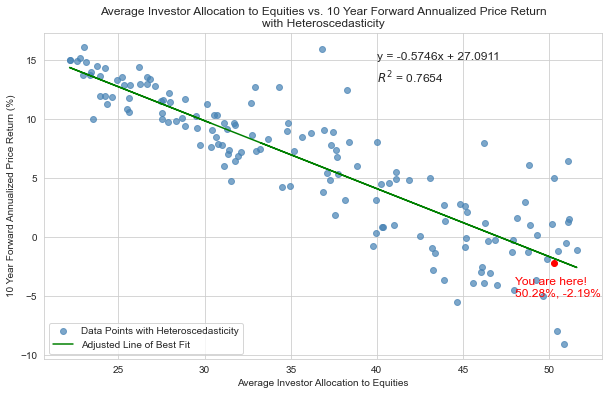

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Set up the notebook style
sns.set_style("whitegrid")

# Create synthetic data that replicates the plot
np.random.seed(42)

# Generate average investor allocation to equities (X)
x = np.random.uniform(22, 52, 150)

# Define slope and intercept for the linear trend
slope = -0.5986  # Adjust this value to increase or decrease the slope
intercept = 27.79  # Adjust this value to change the intercept

# Introduce more complex noise and heteroscedasticity
# The variance of the noise will increase as the 'Average Investor Allocation' increases
heteroscedastic_noise = np.random.normal(0, 1 + (x - np.min(x)) / 9, len(x))
y_heteroscedastic = slope * x + intercept + heteroscedastic_noise  # Apply new noise with heteroscedasticity

# Create a dataset with heteroscedastic data
data_heteroscedastic = pd.DataFrame({'Average_Investor_Allocation': x, 'Forward_Annualized_Price_Return': y_heteroscedastic})

# Fit a linear regression model to plot the line of best fit
model = LinearRegression()
x_reshaped = x.reshape(-1, 1)
model.fit(x_reshaped, y_heteroscedastic)
y_pred_heteroscedastic = model.predict(x_reshaped)

# Plot the synthetic data with heteroscedasticity and the adjusted line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y_heteroscedastic, color='steelblue', alpha=0.7, label='Data Points with Heteroscedasticity')
plt.plot(x, y_pred_heteroscedastic, color='green', label='Adjusted Line of Best Fit')

# Add annotations for the new line equation and R^2 value
plt.text(40, 15, f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}', fontsize=12)
r_squared_heteroscedastic = model.score(x_reshaped, y_heteroscedastic)
plt.text(40, 13, f'$R^2$ = {r_squared_heteroscedastic:.4f}', fontsize=12)

# Annotate a specific point (similar to the "You are here!" point in the provided plot)
plt.scatter(50.28, -2.19, color='red', zorder=5)
plt.annotate('You are here!\n50.28%, -2.19%', xy=(50.28, -2.19), xytext=(48, -5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12, color='red')

# Add labels and title
plt.title('Average Investor Allocation to Equities vs. 10 Year Forward Annualized Price Return\nwith Heteroscedasticity')
plt.xlabel('Average Investor Allocation to Equities')
plt.ylabel('10 Year Forward Annualized Price Return (%)')

plt.grid(True)
plt.legend()

# Show the updated plot
plt.show()

CAGR: 3.04
Standard Deviation: 6.46
Duration (in years): 24.25
Multiple: 1.07


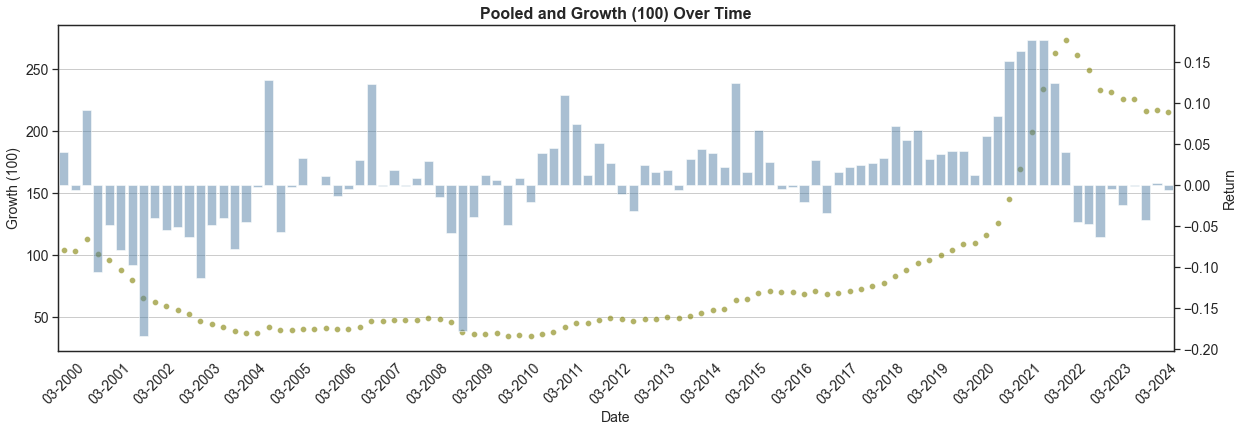

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Load the Excel file
df = pd.read_excel('Funds_Time_Series_Calculator-300.xlsx')

# Ensure the data is sorted by date
df = df.sort_values('Date')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the duration
duration = df['Date'].max() - df['Date'].min()

# Convert duration to number of days and then to years
n_years = duration.days / 365.25

# Calculate the number of quarters
n_quarters = len(df)

# Get the beginning and ending values
beginning_value = df.loc[n_quarters-1, "Index Value"]
ending_value = df.loc[0, "Index Value"]

# Calculate CAGR
cagr = (ending_value / beginning_value) ** (1/n_years) - 1

# Convert CAGR to percentage and round to 2 decimal places
cagr_percentage = round(cagr * 100, 2)

# Calculate the standard deviation of the 'Pooled*' column
std_dev = df['Return*'].std()

# Calculate the average return of the 'Pooled*' column
avg_return = df['Return*'].mean()

# We assume a risk-free rate of 0 for simplicity
risk_free_rate = 0

# Calculate the Sharpe Ratio
sharpe_ratio = (avg_return - risk_free_rate) / std_dev

# Round the standard deviation and Sharpe ratio to 2 decimal places
std_dev_percent = round(std_dev*100, 2)
sharpe_ratio = round(sharpe_ratio, 2)

# Calculate MOIC
f_ending_value = df.loc[0, 'Index Value']
moic = (f_ending_value - beginning_value) / beginning_value

# Print the results
print("CAGR:", cagr_percentage)
print("Standard Deviation:", std_dev_percent)
#print("Sharpe Ratio:", sharpe_ratio)
print("Duration (in years):", round(n_years, 2))
print("Multiple:", round(moic, 2))

# Ensure the data is sorted by date
df = df.sort_values('Date')

# Format the 'Date' column to display only month, day, and year
df['Date_formatted'] = df['Date'].dt.strftime('%m-%Y')

# Set the plot style to a visually appealing one
sns.set_style("white")

# Initialize the figure size
fig, ax1 = plt.subplots(figsize=(20, 6))

# Create a scatter plot
sns.scatterplot(x='Date_formatted', y='Index Value', data=df, alpha=.6, s=35, color='olive', ax=ax1)

# Add horizontal gridlines
ax1.grid(True, axis='y')

# Label y-axis
ax1.set_ylabel('Growth (100)', fontsize=14)

# Create a new axis for the bar plot
ax2 = ax1.twinx()

# Create a bar plot with the 'Pooled*' data
sns.barplot(x='Date_formatted', y='Return*', data=df, color='steelblue', alpha=0.5, ax=ax2)

# Label y-axis
ax2.set_ylabel('Return', fontsize=14)

# Give the plot a title and set the axes labels
plt.title('Pooled and Growth (100) Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)

# To fix the overlap, we can reduce the number of x-axis labels by only keeping every nth label
for ind, label in enumerate(ax1.get_xticklabels()):
    if ind % 4 == 0:  # this keeps every nth label (change the number to keep more or less labels)
        label.set_visible(True)
    else:
        label.set_visible(False)

# Rotate x-axis labels
plt.setp(ax1.get_xticklabels(), rotation=45)  # you can adjust the rotation degree here

# Save the plot as a file
plt.savefig('All Quarters.png', dpi=600)

# Display the plot
plt.show()

Probability of losing money: 0.00%
Expected final value: $28,322.22
Standard deviation: $6,328.76
Median final value: $27,388.78


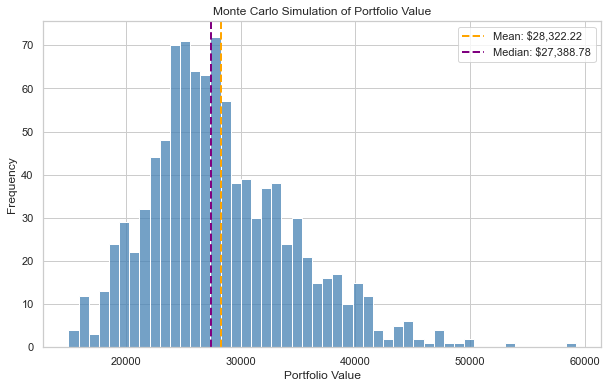

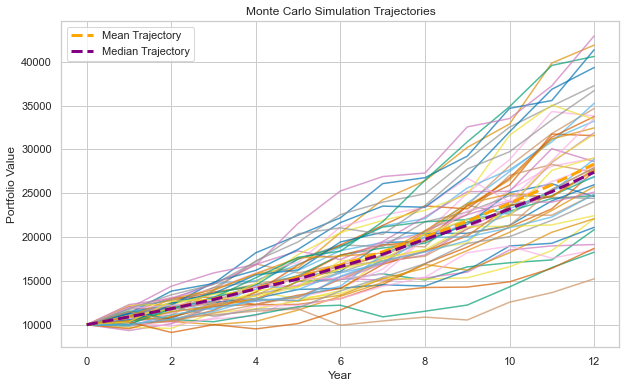

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots and color palette
sns.set(style="whitegrid")
sns.set_palette("colorblind")  # Use colorblind-friendly palette

# Define parameters
initial_investment = 10000
years = 12
simulations = 1000
mean_return = 0.09
volatility = 0.07

# Run Monte Carlo simulation
final_values = np.zeros(simulations)
trajectories = np.zeros((simulations, years + 1))

for i in range(simulations):
    value = initial_investment
    trajectories[i, 0] = value
    for j in range(1, years + 1):
        annual_return = np.random.normal(mean_return, volatility)
        value *= (1 + annual_return)
        trajectories[i, j] = value
    final_values[i] = value

# Calculate statistics
loss_prob = np.mean(final_values < initial_investment)
expected_value = np.mean(final_values)
std_dev = np.std(final_values)
median_value = np.median(final_values)

print(f"Probability of losing money: {loss_prob:.2%}")
print(f"Expected final value: ${expected_value:,.2f}")
print(f"Standard deviation: ${std_dev:,.2f}")
print(f"Median final value: ${median_value:,.2f}")

# Plot histogram of final values
plt.figure(figsize=(10, 6))
sns.histplot(final_values, bins=50, kde=False, color='steelblue', edgecolor='white')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Portfolio Value')
plt.axvline(expected_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mean: ${expected_value:,.2f}')
plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: ${median_value:,.2f}')
plt.legend(loc='upper right')  # Move legend to top right
plt.legend(loc='upper right')  # Move legend to top right
plt.legend(loc='upper right')  # Move legend to top right
plt.show()

# Plot trajectories of simulations
plt.figure(figsize=(10, 6))
num_trajectories_to_plot = 50  # Plot a subset to avoid clutter
for i in range(num_trajectories_to_plot):
    plt.plot(range(years + 1), trajectories[i], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('Monte Carlo Simulation Trajectories')

# Plot mean and median trajectories
mean_trajectory = np.mean(trajectories, axis=0)
median_trajectory = np.median(trajectories, axis=0)
plt.plot(range(years + 1), mean_trajectory, color='orange', linestyle='dashed', linewidth=3, label='Mean Trajectory')
plt.plot(range(years + 1), median_trajectory, color='purple', linestyle='dashed', linewidth=3, label='Median Trajectory')

plt.legend()
plt.show()

Parameters:
alpha = 2.5
x_min = 4.0
T = 10.0

Expected Value E[X] = 6.67
Probability P(X > T) = 0.10
Expected Value E[X | X > T] = 16.67
Fraction of Expected Value from Tail Events = 0.25

Verification:
Contribution from Tail Events (E[X | X > T] * P(X > T)) = 1.69
E[X] * Fraction = 1.69
Difference = 0.0



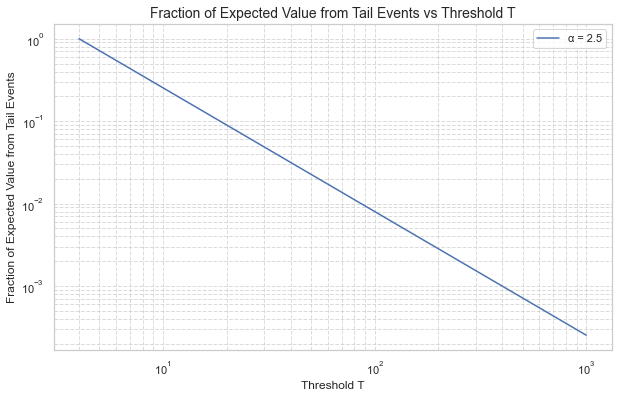

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots and color palette
sns.set(style="whitegrid")

# Parameters (you can tune these)
alpha = 2.5   # Power-law exponent (alpha > 1)
x_min = 4.0   # Minimum value of x (x >= x_min)
T = 10.0      # Threshold for tail events (T >= x_min)

# Compute Expected Value E[X]
if alpha > 1:
    E_X = (alpha * x_min) / (alpha - 1)
else:
    E_X = np.inf  # Expected value is infinite for alpha <= 1

# Compute Probability P(X > T)
if T >= x_min:
    P_X_gt_T = (x_min / T) ** alpha
else:
    P_X_gt_T = 1.0  # If T < x_min, all events are considered tail events

# Compute Expected Value E[X | X > T]
if T >= x_min and alpha > 1:
    E_X_given_X_gt_T = (alpha * T) / (alpha - 1)
else:
    E_X_given_X_gt_T = E_X  # All events or infinite expected value

# Compute Fraction of Expected Value from Tail Events
if T >= x_min:
    Fraction = (x_min / T) ** (alpha - 1)
else:
    Fraction = 1.0  # All expected value comes from tail events

# Verify that E[X | X > T] * P(X > T) = E[X] * Fraction
Contribution = E_X_given_X_gt_T * P_X_gt_T
Contribution_check = E_X * Fraction

# Print the results
print(f"Parameters:")
print(f"alpha = {alpha}")
print(f"x_min = {x_min}")
print(f"T = {T}\n")

print(f"Expected Value E[X] = {E_X:.2f}")
print(f"Probability P(X > T) = {P_X_gt_T:.2f}")
print(f"Expected Value E[X | X > T] = {E_X_given_X_gt_T:.2f}")
print(f"Fraction of Expected Value from Tail Events = {Fraction:.2f}\n")

print(f"Verification:")
print(f"Contribution from Tail Events (E[X | X > T] * P(X > T)) = {Contribution:.2f}")
print(f"E[X] * Fraction = {Contribution_check:.2f}")
print(f"Difference = {abs(Contribution - Contribution_check)}\n")

# Plotting the Fraction vs Threshold T
# Define a range of T values
T_values = np.logspace(np.log10(x_min), 3, 500)  # From x_min to 1000

Fraction_values = []

for T_i in T_values:
    if T_i >= x_min:
        Fraction_i = (x_min / T_i) ** (alpha - 1)
    else:
        Fraction_i = 1.0
    Fraction_values.append(Fraction_i)

# Plotting the Fraction of Expected Value from Tail Events
plt.figure(figsize=(10, 6))
plt.loglog(T_values, Fraction_values, label=f'α = {alpha}')
plt.xlabel('Threshold T', fontsize=12)
plt.ylabel('Fraction of Expected Value from Tail Events', fontsize=12)
plt.title('Fraction of Expected Value from Tail Events vs Threshold T', fontsize=14)
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.7)
plt.show()